### 라이브러리

In [ ]:
# from sklearn.datasets import make_moons

# from sklearn.cluster import KMeans

# from sklearn.cluster import AgglomerativeClustering

# from sklearn.cluster import DBSCAN

# from sklearn.metrics.cluster import adjusted_rand_score

# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.preprocessing import MinMaxScaler

# import matplotlib.pyplot as plt

# import numpy as np

# import mglearn

# import pandas as pd
# import numpy as np
# import glob
# import os
# import chardet
# import pprint
# from tqdm import notebook
# import datetime
# import collections
# import folium

In [309]:
import pandas as pd
import numpy as np
import glob, os, chardet, pprint
from tqdm import notebook
import datetime
import collections
import folium

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action='ignore')

In [444]:
# display 설정
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
pwd

'C:\\Users\\justi\\OneDrive\\Git\\Team 6\\Ddareung'

In [3]:
def readcsv_(Path_folder, header = 0):

    file_list = notebook.tqdm([file for file in os.listdir(Path_folder) if file.endswith(('.csv','.xlsx'))])
    df_list = []
    encodings = ['utf-8', 'cp949', 'euc-kr', 'cp1252', 'cp850']

    for idx, file in enumerate(file_list): #, total = len(file_list), leave = True)
        print(f'({idx}) {file}')
        if file.endswith(".csv"):
            for cp in encodings:
                try:
                    locals()[f'df{idx+1}'] = pd.read_csv(Path_folder+file, encoding = cp, header = header)
                    df_list.append(locals()[f'df{idx+1}'])
                    break
                except: # 에러 종류
                    pass
        elif file.endswith(".xlsx"):
                locals()[f'df{idx+1}'] = pd.read_excel(Path_folder+file, header = header)
                df_list.append(locals()[f'df{idx+1}'])

        else:
            print(f'     {"*"*8}이 파일은 읽을 수 없습니다{"*"*8}')

    print(f'\n폴더 내 csv / xlsx 파일 개수: {len(file_list)}개')
    print(f'총 데이터프레임 개수: {len(df_list)}개')

    return df_list

In [4]:
# dt_index = pandas.date_range(start='20160901', end='20161031')
# # pandas.date_range(start='20160901', end='20161031',freq='W-MON')
# # 을 하면 해당 기간 매주 월요일들만 추출합니다.

# # type(dt_index) => DatetimeIndex
# # DatetimeIndex => list(str)
# dt_list = dt_index.strftime("%Y%m%d").tolist()

# for i in dt_list:
#     print(i)

In [5]:
# New = readcsv_(os.getcwd() + '/New data/')

## Data

### 거치소 정보

In [6]:
Bike_lock = pd.read_csv(os.getcwd() + '/New data/bike_location_final.csv')

In [7]:
Bike_lock

,대여소이름,위도,경도,주소,자치구
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구
1,1002. 해공공원(천호동),37.545261,127.125946,서울특별시 강동구 천호동 360,강동구
2,1003. 해공도서관앞,37.543957,127.125488,서울특별시 강동구 천호동 360,강동구
3,1004. 삼성광나루아파트 버스정류장,37.553329,127.128868,서울특별시 강동구 암사동 463-2,강동구
4,1006. 롯데캐슬 115동앞,37.554867,127.142799,서울특별시 강동구 암사동 414-2,강동구
...,...,...,...,...,...
2038,992.북한산입구 정류장,37.658428,126.946060,서울특별시 은평구 진관동 289,은평구
2039,993.은평뉴타운 온뜨락아파트앞,37.630287,126.919563,서울특별시 은평구 진관동 234-34,은평구
2040,994.북한산생태공원입구(교통섬),37.610508,126.938538,서울특별시 은평구 불광동 2-1,은평구
2041,995.은평다목적체육관,37.631409,126.925407,서울특별시 은평구 진관동 125,은평구


In [8]:
Bike_lock['대여소명'] = Bike_lock['대여소이름'].apply(lambda x: x.split('.')[1:][0])
Bike_lock['대여소번호'] = Bike_lock['대여소이름'].apply(lambda x: x.split('.')[0])

In [9]:
Bike_lock

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001
1,1002. 해공공원(천호동),37.545261,127.125946,서울특별시 강동구 천호동 360,강동구,해공공원(천호동),1002
2,1003. 해공도서관앞,37.543957,127.125488,서울특별시 강동구 천호동 360,강동구,해공도서관앞,1003
3,1004. 삼성광나루아파트 버스정류장,37.553329,127.128868,서울특별시 강동구 암사동 463-2,강동구,삼성광나루아파트 버스정류장,1004
4,1006. 롯데캐슬 115동앞,37.554867,127.142799,서울특별시 강동구 암사동 414-2,강동구,롯데캐슬 115동앞,1006
...,...,...,...,...,...,...,...
2038,992.북한산입구 정류장,37.658428,126.946060,서울특별시 은평구 진관동 289,은평구,북한산입구 정류장,992
2039,993.은평뉴타운 온뜨락아파트앞,37.630287,126.919563,서울특별시 은평구 진관동 234-34,은평구,은평뉴타운 온뜨락아파트앞,993
2040,994.북한산생태공원입구(교통섬),37.610508,126.938538,서울특별시 은평구 불광동 2-1,은평구,북한산생태공원입구(교통섬),994
2041,995.은평다목적체육관,37.631409,126.925407,서울특별시 은평구 진관동 125,은평구,은평다목적체육관,995


In [10]:
Bike_location = pd.read_csv(os.getcwd() + '\\New data\\bike_location_final.csv', encoding = 'utf-8') # 최신 거치대 위치 정보

In [11]:
Bike_location['대여소명'] = Bike_location['대여소이름'].apply(lambda x: x.split('.')[1:][0])
Bike_location['대여소번호'] = Bike_location['대여소이름'].apply(lambda x: x.split('.')[0])

In [12]:
Bike_lock[Bike_lock['대여소번호'] == '1004']

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호
3,1004. 삼성광나루아파트 버스정류장,37.553329,127.128868,서울특별시 강동구 암사동 463-2,강동구,삼성광나루아파트 버스정류장,1004


In [13]:
len((set(Bike_location['대여소번호'].unique().tolist()))- set(list(Bike_lock['대여소번호'].unique().tolist())))

0

In [14]:
len( set(list(Bike_lock['대여소번호'].unique().tolist())) - (set(Bike_location['대여소번호'].unique().tolist())))

0

In [15]:
# ## 자전거 대여이력(**사용량 정보 없음)

# History = New[6]

# History

# History['연'] = History['대여일시'].apply(lambda x: str(x)[0:4])
# History['월'] = History['대여일시'].apply(lambda x: str(x)[5:7])
# History['일'] = History['대여일시'].apply(lambda x: str(x)[8:11])

# History['대여날짜'] = History['대여날짜'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
# History['대여시각'] = History['대여시각'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M'))
# # History['대여일시'] = History['대여일시'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M'))

# History['요일'] = History['대여날짜'].apply(lambda x: x.weekday())

# History['시간대'] = History['대여시각'].apply(lambda x: x.hour)

# # a = '20:20:00'
# # b= datetime.datetime.strptime(a, "%H:%M:%S")
# # b.hour()

# History

# History.info()

# History_group = History.groupby(['대여 대여소명','요일','시간대']).count()

### 시간별 자전거 이용정보 2020

In [16]:
pwd

'C:\\Users\\justi\\OneDrive\\Git\\Team 6\\Ddareung'

In [17]:
Hour_bike_usage = pd.read_csv(os.getcwd() + '/New data/Hour_bike_usage_2020.csv', encoding = 'cp949')

In [18]:
Hour_bike_usage.head(4)

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여일자datetime,요일,연도,월
0,2020-02-01,0,1442,1442. (구)신한은행 중랑교지점,정기권,~10대,1,53.86,0.32,1360.0,6,2020-02-01,5,2020,2
1,2020-02-01,0,1339,1339. 삼성전자서비스 성북센터,정기권,~10대,1,10.04,0.09,390.0,3,2020-02-01,5,2020,2
2,2020-02-01,0,1960,1960. 화광신문사 앞,정기권,~10대,1,75.14,0.64,2750.0,24,2020-02-01,5,2020,2
3,2020-02-01,0,394,394. 경희궁 자이 3단지,정기권,~10대,1,28.42,0.18,780.0,3,2020-02-01,5,2020,2


In [19]:
Hour_bike_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6054830 entries, 0 to 6054829
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   대여일자          object 
 1   대여시간          int64  
 2   대여소번호         int64  
 3   대여소명          object 
 4   대여구분코드        object 
 5   연령대코드         object 
 6   이용건수          int64  
 7   운동량           object 
 8   탄소량           object 
 9   이동거리          float64
 10  사용시간          int64  
 11  대여일자datetime  object 
 12  요일            int64  
 13  연도            int64  
 14  월             int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 692.9+ MB


In [20]:
Hour_bike_usage = Hour_bike_usage.astype({'대여시간':'str', '대여소번호' : 'str', '요일': 'str', '연도': 'str', '월':'str'})

In [21]:
# Hour_bike_usage[Hour_bike_usage['대여소번호'] == 99998]

In [22]:
# Hour_bike_usage['대여소명'] = Hour_bike_usage['대여소명'].apply(lambda x: x.split('.')[-1])
# Hour_bike_usage['대여일자datetime'] = Hour_bike_usage['대여일자'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
# Hour_bike_usage['요일'] = Hour_bike_usage['대여일자datetime'].apply(lambda x: x.weekday())
# Hour_bike_usage['연도'] = Hour_bike_usage['대여일자'].apply(lambda x: str(x)[:4])

In [23]:
Hour_bike_usage_group = Hour_bike_usage.groupby(['대여소명','대여소번호','요일','대여시간'],as_index = False).mean()

In [24]:
Hour_bike_usage_group

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),1001,0,0,1.076923,2112.692308,29.153846
1,1001. 광진교 남단 사거리(디지털프라자앞),1001,0,1,1.172414,5021.379310,24.896552
2,1001. 광진교 남단 사거리(디지털프라자앞),1001,0,10,1.074074,1916.666667,35.629630
3,1001. 광진교 남단 사거리(디지털프라자앞),1001,0,11,1.200000,2626.666667,42.633333
4,1001. 광진교 남단 사거리(디지털프라자앞),1001,0,12,1.195652,3727.391304,25.391304
...,...,...,...,...,...,...,...
288904,중랑센터,3,3,18,1.000000,32640.000000,22.000000
288905,중랑센터,3,4,16,1.000000,28490.000000,18.333333
288906,중랑센터,3,4,17,1.000000,1210.000000,11.000000
288907,중랑센터,3,4,18,1.000000,625.000000,15.500000


#### 일정하지 않은 데이터

In [25]:
Hour_bike_usage_group[Hour_bike_usage_group['대여소번호'] == '993']

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
288443,993.은평뉴타운 온뜨락아파트앞,993,0,1,1.00,0.000,25.000000
288444,993.은평뉴타운 온뜨락아파트앞,993,0,15,1.00,0.000,9.500000
288445,993.은평뉴타운 온뜨락아파트앞,993,0,17,2.00,0.000,28.000000
288446,993.은평뉴타운 온뜨락아파트앞,993,0,18,1.00,0.000,6.000000
288447,993.은평뉴타운 온뜨락아파트앞,993,0,21,1.00,0.000,21.000000
288448,993.은평뉴타운 온뜨락아파트앞,993,0,22,1.00,0.000,38.000000
288449,993.은평뉴타운 온뜨락아파트앞,993,0,23,1.00,0.000,45.000000
288450,993.은평뉴타운 온뜨락아파트앞,993,1,0,1.00,0.000,14.000000
288451,993.은평뉴타운 온뜨락아파트앞,993,1,14,1.00,3860.335,39.500000
288452,993.은평뉴타운 온뜨락아파트앞,993,1,15,1.00,0.000,97.000000


In [26]:
993

993

In [27]:
## 나중에 try/except, .format, int(h), range(24)로 간결하게 만들기.
### 00시, 01시 처럼 2자리로 만들어야함
def to_strhour_day(h):
        h = int(h)
        for i in range(24):
            if h == i:
                return f'평일 {h:02d}시'#.format(h)
            
def to_strhour_end(h):
        h = int(h)
        for i in range(24):
            if h == i:
                return f'주말 {h:02d}시'#.format(h)

In [28]:
def to_strday(d):
    try:
        d = int(d)
        for idx, D in enumerate(['월','화','수','목','금','토','일']):
            if d == idx:
                return D
    except:
        pass

#### 요일 value 수정

In [29]:
Hour_bike_usage_group['요일'] = Hour_bike_usage_group['요일'].map(lambda x: to_strday(x))

In [30]:
Hour_bike_usage_group.head(5)

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,0,1.076923,2112.692308,29.153846
1,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,1,1.172414,5021.379310,24.896552
2,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,10,1.074074,1916.666667,35.629630
3,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,11,1.200000,2626.666667,42.633333
4,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,12,1.195652,3727.391304,25.391304


In [31]:
Hour_bike_usage_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288909 entries, 0 to 288908
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여소명    288909 non-null  object 
 1   대여소번호   288909 non-null  object 
 2   요일      288909 non-null  object 
 3   대여시간    288909 non-null  object 
 4   이용건수    288909 non-null  float64
 5   이동거리    288909 non-null  float64
 6   사용시간    288909 non-null  float64
dtypes: float64(3), object(4)
memory usage: 17.6+ MB


#### 평일 이용량
- 거치소별 1년간 평일 평균 24시간 동안 각시간별 사용량

In [32]:
Hour_bike_usage_weekday = Hour_bike_usage_group[(Hour_bike_usage_group['요일'] == '월') |
                     (Hour_bike_usage_group['요일'] == '화') |
                     (Hour_bike_usage_group['요일'] == '수') | 
                     (Hour_bike_usage_group['요일'] == '목') | 
                     (Hour_bike_usage_group['요일'] == '금')]

Hour_bike_usage_weekday = Hour_bike_usage_weekday.astype({'대여소번호' : 'int32'})

Hour_bike_usage_weekday = Hour_bike_usage_weekday.astype({'대여소번호' : 'str'})

In [33]:
Hour_bike_usage_weekday['대여시간'] = Hour_bike_usage_weekday['대여시간'].map(lambda x: to_strhour_day(x))

<ipython-input-33-fdd3d13f76b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hour_bike_usage_weekday['대여시간'] = Hour_bike_usage_weekday['대여시간'].map(lambda x: to_strhour_day(x))


In [34]:
Hour_bike_usage_weekday

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 00시,1.076923,2112.692308,29.153846
1,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 01시,1.172414,5021.379310,24.896552
2,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 10시,1.074074,1916.666667,35.629630
3,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 11시,1.200000,2626.666667,42.633333
4,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 12시,1.195652,3727.391304,25.391304
...,...,...,...,...,...,...,...
288904,중랑센터,3,목,평일 18시,1.000000,32640.000000,22.000000
288905,중랑센터,3,금,평일 16시,1.000000,28490.000000,18.333333
288906,중랑센터,3,금,평일 17시,1.000000,1210.000000,11.000000
288907,중랑센터,3,금,평일 18시,1.000000,625.000000,15.500000


In [35]:
len(set(Hour_bike_usage_weekday['대여소명'].values))

2076

In [36]:
# set(Hour_bike_usage_weekday.sort_values('대여소명')['대여소명'])

#### 주말 이용량

- 주말평균 24시간동안 각 시간별사용량

In [37]:
Hour_bike_usage_weekend = Hour_bike_usage_group[(Hour_bike_usage_group['요일'] == '토') |
                     (Hour_bike_usage_group['요일'] == '일')]

In [38]:
Hour_bike_usage_weekend['대여소명']

120       1001. 광진교 남단 사거리(디지털프라자앞)
121       1001. 광진교 남단 사거리(디지털프라자앞)
122       1001. 광진교 남단 사거리(디지털프라자앞)
123       1001. 광진교 남단 사거리(디지털프라자앞)
124       1001. 광진교 남단 사거리(디지털프라자앞)
                    ...            
288886                          위트콤
288887                          위트콤
288888                          위트콤
288889                          위트콤
288890                          위트콤
Name: 대여소명, Length: 84948, dtype: object

In [39]:
Hour_bike_usage_weekend['대여시간'] = Hour_bike_usage_weekend['대여시간'].map(lambda x: to_strhour_end(x))

<ipython-input-39-039a2e6b0ad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hour_bike_usage_weekend['대여시간'] = Hour_bike_usage_weekend['대여시간'].map(lambda x: to_strhour_end(x))


In [40]:
Hour_bike_usage_weekend

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
120,1001. 광진교 남단 사거리(디지털프라자앞),1001,토,주말 00시,1.205882,5835.000000,25.235294
121,1001. 광진교 남단 사거리(디지털프라자앞),1001,토,주말 01시,1.214286,2941.666667,17.738095
122,1001. 광진교 남단 사거리(디지털프라자앞),1001,토,주말 10시,1.083333,3376.666667,45.250000
123,1001. 광진교 남단 사거리(디지털프라자앞),1001,토,주말 11시,1.250000,9106.111111,42.305556
124,1001. 광진교 남단 사거리(디지털프라자앞),1001,토,주말 12시,1.300000,4972.000000,43.225000
...,...,...,...,...,...,...,...
288886,위트콤,10,일,주말 15시,1.000000,0.000000,57.333333
288887,위트콤,10,일,주말 16시,1.000000,0.000000,2.000000
288888,위트콤,10,일,주말 17시,1.000000,0.000000,8.000000
288889,위트콤,10,일,주말 18시,1.000000,0.000000,3.000000


#### 최신 거치대 위치 정보와 병합

In [41]:
Bike_location = pd.read_csv(os.getcwd() + '\\New data\\bike_location_final.csv', encoding = 'utf-8') # 최신 거치대 위치 정보

In [42]:
Bike_location['대여소명'] = Bike_location['대여소이름'].apply(lambda x: x.split('.')[1:][0])
Bike_location['대여소번호'] = Bike_location['대여소이름'].apply(lambda x: x.split('.')[0])

In [43]:
Bike_location

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001
1,1002. 해공공원(천호동),37.545261,127.125946,서울특별시 강동구 천호동 360,강동구,해공공원(천호동),1002
2,1003. 해공도서관앞,37.543957,127.125488,서울특별시 강동구 천호동 360,강동구,해공도서관앞,1003
3,1004. 삼성광나루아파트 버스정류장,37.553329,127.128868,서울특별시 강동구 암사동 463-2,강동구,삼성광나루아파트 버스정류장,1004
4,1006. 롯데캐슬 115동앞,37.554867,127.142799,서울특별시 강동구 암사동 414-2,강동구,롯데캐슬 115동앞,1006
...,...,...,...,...,...,...,...
2038,992.북한산입구 정류장,37.658428,126.946060,서울특별시 은평구 진관동 289,은평구,북한산입구 정류장,992
2039,993.은평뉴타운 온뜨락아파트앞,37.630287,126.919563,서울특별시 은평구 진관동 234-34,은평구,은평뉴타운 온뜨락아파트앞,993
2040,994.북한산생태공원입구(교통섬),37.610508,126.938538,서울특별시 은평구 불광동 2-1,은평구,북한산생태공원입구(교통섬),994
2041,995.은평다목적체육관,37.631409,126.925407,서울특별시 은평구 진관동 125,은평구,은평다목적체육관,995


In [44]:
Bike_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소이름   2043 non-null   object 
 1   위도      2043 non-null   float64
 2   경도      2043 non-null   float64
 3   주소      2043 non-null   object 
 4   자치구     2043 non-null   object 
 5   대여소명    2043 non-null   object 
 6   대여소번호   2043 non-null   object 
dtypes: float64(2), object(5)
memory usage: 111.9+ KB


In [45]:
# Bike_location.astype({'대여소번호': 'str'}).dtypes

In [46]:
# Hour_bike_usage_weekday['대여소번호'] = Hour_bike_usage_weekday['대여소번호'].astype('str')

In [47]:
len((set(Bike_location['대여소번호'].unique().tolist()))- set(list(Hour_bike_usage_weekday['대여소번호'].unique().tolist())))

43

In [48]:
# len(set(str(Bike_location['대여소명'].values))-set(str(Hour_bike_usage_weekday['대여소명'].values)))

##### 평일

In [49]:
Hour_bike_usage_weekday

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 00시,1.076923,2112.692308,29.153846
1,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 01시,1.172414,5021.379310,24.896552
2,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 10시,1.074074,1916.666667,35.629630
3,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 11시,1.200000,2626.666667,42.633333
4,1001. 광진교 남단 사거리(디지털프라자앞),1001,월,평일 12시,1.195652,3727.391304,25.391304
...,...,...,...,...,...,...,...
288904,중랑센터,3,목,평일 18시,1.000000,32640.000000,22.000000
288905,중랑센터,3,금,평일 16시,1.000000,28490.000000,18.333333
288906,중랑센터,3,금,평일 17시,1.000000,1210.000000,11.000000
288907,중랑센터,3,금,평일 18시,1.000000,625.000000,15.500000


In [50]:
len((set(Bike_location['대여소번호'].unique().tolist()))- set(list(Hour_bike_usage_weekday['대여소번호'].unique().tolist())))

43

In [51]:
set(Bike_location['대여소번호'].unique().tolist()) - set(list(Hour_bike_usage_weekday['대여소번호'].unique().tolist()))

{'1072',
 '1082',
 '1471',
 '1550',
 '1571',
 '1572',
 '1695',
 '1750',
 '1751',
 '1762',
 '1767',
 '2078',
 '2079',
 '2386',
 '2524',
 '2525',
 '2550',
 '2627',
 '2638',
 '2650',
 '2656',
 '2743',
 '2744',
 '2914',
 '295',
 '3013',
 '3125',
 '3130',
 '3401',
 '3425',
 '3547',
 '3573',
 '3600',
 '3652',
 '3802',
 '3906',
 '4652',
 '4702',
 '4711',
 '480',
 '494',
 '796',
 '859'}

In [52]:
Bike_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소이름   2043 non-null   object 
 1   위도      2043 non-null   float64
 2   경도      2043 non-null   float64
 3   주소      2043 non-null   object 
 4   자치구     2043 non-null   object 
 5   대여소명    2043 non-null   object 
 6   대여소번호   2043 non-null   object 
dtypes: float64(2), object(5)
memory usage: 111.9+ KB


In [53]:
Hour_bike_usage_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203961 entries, 0 to 288908
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여소명    203961 non-null  object 
 1   대여소번호   203961 non-null  object 
 2   요일      203961 non-null  object 
 3   대여시간    203961 non-null  object 
 4   이용건수    203961 non-null  float64
 5   이동거리    203961 non-null  float64
 6   사용시간    203961 non-null  float64
dtypes: float64(3), object(4)
memory usage: 12.4+ MB


In [54]:
### 새로 추가된 대여소로 추정
Hour_bike_usage_weekday[Hour_bike_usage_weekday['대여소번호'] == '2550']

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간


In [55]:
Hour_bike_usage_weekday = Hour_bike_usage_weekday.drop('대여소명', axis = 1)

In [56]:
Hour_bike_usage_weekday_location = pd.merge(Bike_location, Hour_bike_usage_weekday, how = 'left',on = '대여소번호')

In [57]:
Hour_bike_usage_weekday_location.isna().sum()

대여소이름     0
위도        0
경도        0
주소        0
자치구       0
대여소명      0
대여소번호     0
요일       43
대여시간     43
이용건수     43
이동거리     43
사용시간     43
dtype: int64

In [58]:
Hour_bike_usage_weekday_location[Hour_bike_usage_weekday_location['이용건수'].isna()].index

Int64Index([  7669,   8507,  45171,  50847,  51476,  51477,  60114,  64868,
             64869,  65271,  65325,  85964,  85965, 113358, 119309, 119310,
            120228, 123592, 124462, 125687, 126146, 129410, 129411, 132996,
            133607, 134646, 137234, 137375, 140645, 142093, 148099, 149276,
            149952, 150433, 151815, 152852, 159746, 160095, 160194, 160512,
            161117, 186119, 191494],
           dtype='int64')

In [59]:
Hour_bike_usage_weekday_location_nan = Hour_bike_usage_weekday_location[Hour_bike_usage_weekday_location['이용건수'].isna()]
Hour_bike_usage_weekday_location.drop(Hour_bike_usage_weekday_location[Hour_bike_usage_weekday_location['이용건수'].isna()].index)

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 00시,1.076923,2112.692308,29.153846
1,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 01시,1.172414,5021.379310,24.896552
2,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 10시,1.074074,1916.666667,35.629630
3,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 11시,1.200000,2626.666667,42.633333
4,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 12시,1.195652,3727.391304,25.391304
...,...,...,...,...,...,...,...,...,...,...,...,...
199377,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,금,평일 03시,1.000000,0.000000,23.000000
199378,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,금,평일 06시,1.000000,0.000000,120.000000
199379,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,금,평일 07시,1.000000,0.000000,8.000000
199380,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,금,평일 08시,1.500000,0.000000,12.500000


In [60]:
Hour_bike_usage_weekday_location_nan

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
7669,1072.고덕역 5번출구,37.554863,127.153725,서울특별시 강동구 명일동 46-5,강동구,고덕역 5번출구,1072,NaN,NaN,NaN,NaN,NaN
8507,1082.중앙보훈병원역3번출구,37.529560,127.149010,서울특별시 강동구 둔촌동 산 11-5,강동구,중앙보훈병원역3번출구,1082,NaN,NaN,NaN,NaN,NaN
45171,1471.동양쇼핑 정류소 앞,37.615353,127.078491,서울특별시 중랑구 묵동 190-2,중랑구,동양쇼핑 정류소 앞,1471,NaN,NaN,NaN,NaN,NaN
50847,1550.삼각산아이원아파트(105동 옆),37.615223,127.018509,서울특별시 강북구 미아동 1357,강북구,삼각산아이원아파트(105동 옆),1550,NaN,NaN,NaN,NaN,NaN
51476,1571.북서울 꿈의 숲 입구,37.626732,127.038773,서울특별시 강북구 번동 140-1,강북구,북서울 꿈의 숲 입구,1571,NaN,NaN,NaN,NaN,NaN
51477,1572.우이산 입구,37.664463,127.011841,서울특별시 강북구 우이동 207-14,강북구,우이산 입구,1572,NaN,NaN,NaN,NaN,NaN
60114,1695.월계미륭아파트 정문,37.623222,127.067024,서울특별시 노원구 월계동 13,노원구,월계미륭아파트 정문,1695,NaN,NaN,NaN,NaN,NaN
64868,1750. 창포원 남쪽 입구,37.688267,127.048897,서울특별시 도봉구 도봉동 4-1,도봉구,창포원 남쪽 입구,1750,NaN,NaN,NaN,NaN,NaN
64869,1751. 창원초등학교 교차로,37.652122,127.041702,서울특별시 도봉구 창동 316,도봉구,창원초등학교 교차로,1751,NaN,NaN,NaN,NaN,NaN
65271,1762.북한산 한신휴플러스APT앞,37.655338,127.042419,서울특별시 도봉구 창동 826,도봉구,북한산 한신휴플러스APT앞,1762,NaN,NaN,NaN,NaN,NaN


In [61]:
Hour_bike_usage_weekday_location = Hour_bike_usage_weekday_location.drop(Hour_bike_usage_weekday_location[Hour_bike_usage_weekday_location['이용건수'].isna()].index)

In [62]:
Hour_bike_usage_weekday_location.head(10)

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 00시,1.076923,2112.692308,29.153846
1,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 01시,1.172414,5021.379310,24.896552
2,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 10시,1.074074,1916.666667,35.629630
3,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 11시,1.200000,2626.666667,42.633333
4,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 12시,1.195652,3727.391304,25.391304
5,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 13시,1.193548,6397.741935,47.806452
6,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 14시,1.175000,13718.000000,52.525000
7,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 15시,1.254902,3654.062549,43.549020
8,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 16시,1.250000,9699.821429,44.142857
9,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 17시,1.266667,4068.833333,46.066667


In [63]:
Hour_bike_usage_weekday_location[Hour_bike_usage_weekday_location['요일'] == '월']

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 00시,1.076923,2112.692308,29.153846
1,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 01시,1.172414,5021.379310,24.896552
2,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 10시,1.074074,1916.666667,35.629630
3,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 11시,1.200000,2626.666667,42.633333
4,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,월,평일 12시,1.195652,3727.391304,25.391304
...,...,...,...,...,...,...,...,...,...,...,...,...
199311,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,월,평일 03시,1.000000,0.000000,9.500000
199312,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,월,평일 06시,1.000000,0.000000,81.750000
199313,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,월,평일 07시,1.000000,0.000000,24.125000
199314,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,월,평일 08시,1.428571,0.000000,21.857143


In [64]:
Hour_bike_usage_weekday_location[Hour_bike_usage_weekday_location['요일'] == '수']

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
48,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,수,평일 00시,1.238095,1924.285714,25.000000
49,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,수,평일 01시,1.176471,2168.529412,31.852941
50,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,수,평일 10시,1.090909,1879.090909,29.590909
51,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,수,평일 11시,1.312500,4200.312500,35.937500
52,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,수,평일 12시,1.085106,3972.978723,29.553191
...,...,...,...,...,...,...,...,...,...,...,...,...
199342,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,수,평일 22시,1.000000,0.000000,9.000000
199343,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,수,평일 03시,1.000000,0.000000,15.000000
199344,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,수,평일 06시,1.000000,0.000000,45.000000
199345,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,수,평일 07시,1.000000,0.000000,10.000000


In [65]:
Weekday_group = Hour_bike_usage_weekday_location.groupby(['대여소이름','대여시간'],as_index = False).mean()

##### 평일 train set

In [66]:
Weekday_trainset = pd.pivot_table(Weekday_group, index = ['대여소이름'], columns= '대여시간', values = '이용건수')#.reset_index()

In [67]:
Weekday_trainset.head()

대여시간,평일 00시,평일 01시,평일 02시,평일 03시,평일 04시,평일 05시,평일 06시,평일 07시,평일 08시,평일 09시,...,평일 14시,평일 15시,평일 16시,평일 17시,평일 18시,평일 19시,평일 20시,평일 21시,평일 22시,평일 23시
대여소이름,,,,,,,,,,,,,,,,,,,,,
1001. 광진교 남단 사거리(디지털프라자앞),1.202527,1.149403,1.119495,1.020000,1.025,1.100000,1.016667,1.075758,1.220375,1.139982,...,1.202857,1.237176,1.258014,1.417734,1.499137,1.348470,1.389970,1.313690,1.379612,1.196037
1002. 해공공원(천호동),1.203159,1.297619,1.072291,1.051748,1.080,1.083969,1.196111,1.134912,1.426098,1.160100,...,1.275592,1.233489,1.338925,1.322382,1.336330,1.296948,1.370526,1.420709,1.319357,1.398991
1003. 해공도서관앞,1.142133,1.042857,1.118182,1.040000,1.000,1.000000,1.100000,1.109473,1.172554,1.045911,...,1.084812,1.077619,1.117362,1.115821,1.083230,1.185415,1.148308,1.242636,1.192863,1.116602
1004. 삼성광나루아파트 버스정류장,1.118225,1.157460,1.040404,1.025000,1.000,1.000000,1.094444,1.059093,1.075199,1.033445,...,1.209046,1.161648,1.208556,1.194500,1.275325,1.246782,1.216220,1.178568,1.401850,1.099032
1006. 롯데캐슬 115동앞,1.084342,1.057516,1.051515,1.000000,1.000,1.000000,1.125000,1.103769,1.128935,1.209835,...,1.126622,1.160098,1.112039,1.156844,1.162834,1.112749,1.099215,1.155730,1.118810,1.039026


##### nan 값 0 채우기(논의 필요)

In [68]:
Weekday_trainset.fillna(0, inplace = True)

In [69]:
# set(Hour_bike_usage_weekday_location['대여소번호'].unique)

##### 주말

In [70]:
Hour_bike_usage_weekend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84948 entries, 120 to 288890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소명    84948 non-null  object 
 1   대여소번호   84948 non-null  object 
 2   요일      84948 non-null  object 
 3   대여시간    84948 non-null  object 
 4   이용건수    84948 non-null  float64
 5   이동거리    84948 non-null  float64
 6   사용시간    84948 non-null  float64
dtypes: float64(3), object(4)
memory usage: 5.2+ MB


In [71]:
Hour_bike_usage_weekend['대여소번호'] = Hour_bike_usage_weekend['대여소번호'].astype('str')

<ipython-input-71-4567e016ab8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hour_bike_usage_weekend['대여소번호'] = Hour_bike_usage_weekend['대여소번호'].astype('str')


In [72]:
len((set(Bike_location['대여소번호'].unique().tolist()))- set(Hour_bike_usage_weekend['대여소번호'].unique().tolist()))

53

In [73]:
set(Bike_location['대여소번호'].unique().tolist())- set(list(Hour_bike_usage_weekend['대여소번호'].unique().tolist()))

{'1070',
 '1072',
 '1082',
 '1471',
 '1474',
 '1550',
 '1571',
 '1572',
 '1695',
 '1746',
 '1750',
 '1751',
 '1762',
 '1767',
 '2078',
 '2079',
 '2083',
 '2386',
 '2427',
 '2524',
 '2548',
 '2549',
 '2550',
 '2627',
 '2638',
 '2650',
 '2656',
 '2657',
 '2708',
 '2719',
 '2743',
 '2744',
 '2914',
 '295',
 '3013',
 '3124',
 '3125',
 '3130',
 '3401',
 '3421',
 '3547',
 '3573',
 '3600',
 '3652',
 '3802',
 '3906',
 '4652',
 '4702',
 '4711',
 '480',
 '494',
 '796',
 '859'}

In [74]:
Bike_location[Bike_location['대여소번호'] == '1070']

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호
69,1070.(시립)고덕평생학습관,37.555702,127.157921,서울특별시 강동구 고덕동 296,강동구,(시립)고덕평생학습관,1070


In [75]:
len(set(Hour_bike_usage_weekday['대여소번호'].unique().tolist()))

2074

In [76]:
len(set(Hour_bike_usage_weekend['대여소번호'].unique().tolist()))

2042

In [77]:
Bike_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소이름   2043 non-null   object 
 1   위도      2043 non-null   float64
 2   경도      2043 non-null   float64
 3   주소      2043 non-null   object 
 4   자치구     2043 non-null   object 
 5   대여소명    2043 non-null   object 
 6   대여소번호   2043 non-null   object 
dtypes: float64(2), object(5)
memory usage: 111.9+ KB


In [78]:
Hour_bike_usage_weekend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84948 entries, 120 to 288890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소명    84948 non-null  object 
 1   대여소번호   84948 non-null  object 
 2   요일      84948 non-null  object 
 3   대여시간    84948 non-null  object 
 4   이용건수    84948 non-null  float64
 5   이동거리    84948 non-null  float64
 6   사용시간    84948 non-null  float64
dtypes: float64(3), object(4)
memory usage: 5.2+ MB


In [79]:
### 새로 추가된 대여소로 추정
Hour_bike_usage_weekend[Hour_bike_usage_weekend['대여소번호'] == '2550']

,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간


In [80]:
Hour_bike_usage_weekend = Hour_bike_usage_weekend.drop('대여소명', axis = 1)

In [81]:
Hour_bike_usage_weekend_location = pd.merge(Bike_location, Hour_bike_usage_weekend, how = 'left',on = '대여소번호')

In [82]:
Hour_bike_usage_weekend_location.isna().sum()

대여소이름     0
위도        0
경도        0
주소        0
자치구       0
대여소명      0
대여소번호     0
요일       53
대여시간     53
이용건수     53
이동거리     53
사용시간     53
dtype: int64

In [83]:
Hour_bike_usage_weekend_location[Hour_bike_usage_weekend_location['이용건수'].isna()].index

Int64Index([ 3101,  3128,  3542, 18552, 18605, 20877, 21221, 21222, 24688,
            26565, 26675, 26676, 26921, 26961, 35336, 35337, 35401, 46467,
            47865, 49021, 49450, 49451, 49500, 50865, 51248, 51773, 51987,
            51988, 52399, 52791, 53542, 53543, 55346, 55637, 56124, 57255,
            57256, 57353, 58789, 59333, 61841, 62445, 62776, 62969, 63516,
            63933, 66659, 66775, 66816, 66977, 67255, 77590, 79804],
           dtype='int64')

In [84]:
Hour_bike_usage_weekend_location_nan = Hour_bike_usage_weekend_location[Hour_bike_usage_weekend_location['이용건수'].isna()]
Hour_bike_usage_weekend_location.drop(Hour_bike_usage_weekend_location[Hour_bike_usage_weekend_location['이용건수'].isna()].index)

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 00시,1.205882,5835.000000,25.235294
1,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 01시,1.214286,2941.666667,17.738095
2,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 10시,1.083333,3376.666667,45.250000
3,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 11시,1.250000,9106.111111,42.305556
4,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 12시,1.300000,4972.000000,43.225000
...,...,...,...,...,...,...,...,...,...,...,...,...
83142,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 04시,1.000000,0.000000,4.000000
83143,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 06시,1.333333,0.000000,88.666667
83144,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 07시,1.200000,0.000000,80.000000
83145,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 08시,1.333333,0.000000,56.000000


In [85]:
Hour_bike_usage_weekend_location_nan

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
3101,1070.(시립)고덕평생학습관,37.555702,127.157921,서울특별시 강동구 고덕동 296,강동구,(시립)고덕평생학습관,1070,NaN,NaN,NaN,NaN,NaN
3128,1072.고덕역 5번출구,37.554863,127.153725,서울특별시 강동구 명일동 46-5,강동구,고덕역 5번출구,1072,NaN,NaN,NaN,NaN,NaN
3542,1082.중앙보훈병원역3번출구,37.529560,127.149010,서울특별시 강동구 둔촌동 산 11-5,강동구,중앙보훈병원역3번출구,1082,NaN,NaN,NaN,NaN,NaN
18552,1471.동양쇼핑 정류소 앞,37.615353,127.078491,서울특별시 중랑구 묵동 190-2,중랑구,동양쇼핑 정류소 앞,1471,NaN,NaN,NaN,NaN,NaN
18605,1474.서울중랑우체국,37.595814,127.082840,서울특별시 중랑구 상봉동 116-20,중랑구,서울중랑우체국,1474,NaN,NaN,NaN,NaN,NaN
20877,1550.삼각산아이원아파트(105동 옆),37.615223,127.018509,서울특별시 강북구 미아동 1357,강북구,삼각산아이원아파트(105동 옆),1550,NaN,NaN,NaN,NaN,NaN
21221,1571.북서울 꿈의 숲 입구,37.626732,127.038773,서울특별시 강북구 번동 140-1,강북구,북서울 꿈의 숲 입구,1571,NaN,NaN,NaN,NaN,NaN
21222,1572.우이산 입구,37.664463,127.011841,서울특별시 강북구 우이동 207-14,강북구,우이산 입구,1572,NaN,NaN,NaN,NaN,NaN
24688,1695.월계미륭아파트 정문,37.623222,127.067024,서울특별시 노원구 월계동 13,노원구,월계미륭아파트 정문,1695,NaN,NaN,NaN,NaN,NaN
26565,1746. 다이소방학점 앞,37.666233,127.043320,서울특별시 도봉구 방학동 706-2,도봉구,다이소방학점 앞,1746,NaN,NaN,NaN,NaN,NaN


In [86]:
Hour_bike_usage_weekend_location = Hour_bike_usage_weekend_location.drop(Hour_bike_usage_weekend_location[Hour_bike_usage_weekend_location['이용건수'].isna()].index)

In [87]:
Hour_bike_usage_weekend_location.head(10)

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 00시,1.205882,5835.000000,25.235294
1,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 01시,1.214286,2941.666667,17.738095
2,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 10시,1.083333,3376.666667,45.250000
3,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 11시,1.250000,9106.111111,42.305556
4,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 12시,1.300000,4972.000000,43.225000
5,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 13시,1.068182,9415.000000,49.954545
6,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 14시,1.383721,13263.255814,69.337209
7,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 15시,1.576271,10454.406780,79.423729
8,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 16시,1.489583,8290.833333,69.697917
9,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 17시,1.393258,8016.067416,52.786517


In [88]:
Hour_bike_usage_weekend_location[Hour_bike_usage_weekend_location['요일'] == '토']

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 00시,1.205882,5835.000000,25.235294
1,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 01시,1.214286,2941.666667,17.738095
2,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 10시,1.083333,3376.666667,45.250000
3,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 11시,1.250000,9106.111111,42.305556
4,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,토,주말 12시,1.300000,4972.000000,43.225000
...,...,...,...,...,...,...,...,...,...,...,...,...
83119,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,토,주말 03시,1.000000,0.000000,12.000000
83120,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,토,주말 06시,1.000000,0.000000,16.000000
83121,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,토,주말 07시,1.000000,0.000000,43.333333
83122,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,토,주말 08시,1.000000,0.000000,12.000000


In [89]:
Hour_bike_usage_weekend_location[Hour_bike_usage_weekend_location['요일'] == '일']

,대여소이름,위도,경도,주소,자치구,대여소명,대여소번호,요일,대여시간,이용건수,이동거리,사용시간
24,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,일,주말 00시,1.275000,3156.926750,22.975000
25,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,일,주말 01시,1.152174,5957.608696,25.956522
26,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,일,주말 10시,1.142857,3159.523810,60.476190
27,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,일,주말 11시,1.216216,7612.972973,54.405405
28,1001. 광진교 남단 사거리(디지털프라자앞),37.541794,127.124748,서울특별시 강동구 천호동 355,강동구,광진교 남단 사거리(디지털프라자앞),1001,일,주말 12시,1.159091,5155.000000,60.931818
...,...,...,...,...,...,...,...,...,...,...,...,...
83142,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 04시,1.000000,0.000000,4.000000
83143,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 06시,1.333333,0.000000,88.666667
83144,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 07시,1.200000,0.000000,80.000000
83145,996.응암역 1번출구,37.598606,126.915405,서울특별시 은평구 신사동 23-3,은평구,응암역 1번출구,996,일,주말 08시,1.333333,0.000000,56.000000


In [90]:
Weekend_group = Hour_bike_usage_weekend_location.groupby(['대여소이름','대여시간'],as_index = False).mean()

In [91]:
Weekend_group

,대여소이름,대여시간,위도,경도,이용건수,이동거리,사용시간
0,1001. 광진교 남단 사거리(디지털프라자앞),주말 00시,37.541794,127.124748,1.240441,4495.963375,24.105147
1,1001. 광진교 남단 사거리(디지털프라자앞),주말 01시,37.541794,127.124748,1.183230,4449.637681,21.847308
2,1001. 광진교 남단 사거리(디지털프라자앞),주말 02시,37.541794,127.124748,1.243386,5160.114101,29.775132
3,1001. 광진교 남단 사거리(디지털프라자앞),주말 03시,37.541794,127.124748,1.045455,4437.599681,18.423445
4,1001. 광진교 남단 사거리(디지털프라자앞),주말 04시,37.541794,127.124748,1.108173,1096.802885,20.939904
...,...,...,...,...,...,...,...
43930,996.응암역 1번출구,주말 19시,37.598606,126.915405,1.351190,0.000000,72.113095
43931,996.응암역 1번출구,주말 20시,37.598606,126.915405,1.100000,0.000000,90.350000
43932,996.응암역 1번출구,주말 21시,37.598606,126.915405,1.266667,0.000000,92.633333
43933,996.응암역 1번출구,주말 22시,37.598606,126.915405,1.214286,658397.068000,71.957143


##### 주말 train set

In [92]:
Weekend_trainset = pd.pivot_table(Weekend_group, index = ['대여소이름'], columns= '대여시간', values = '이용건수')#.reset_index()

In [93]:
Weekend_trainset.head()

대여시간,주말 00시,주말 01시,주말 02시,주말 03시,주말 04시,주말 05시,주말 06시,주말 07시,주말 08시,주말 09시,...,주말 14시,주말 15시,주말 16시,주말 17시,주말 18시,주말 19시,주말 20시,주말 21시,주말 22시,주말 23시
대여소이름,,,,,,,,,,,,,,,,,,,,,
1001. 광진교 남단 사거리(디지털프라자앞),1.240441,1.183230,1.243386,1.045455,1.108173,1.125,1.250000,1.025000,1.019231,1.137500,...,1.366559,1.468858,1.420116,1.465379,1.478363,1.300475,1.378748,1.363128,1.499377,1.282939
1002. 해공공원(천호동),1.314042,1.195238,1.356250,1.145833,1.000000,1.125,1.000000,1.088816,1.068478,1.128571,...,1.278284,1.312245,1.515957,1.445513,1.345984,1.475556,1.423423,1.413068,1.338425,1.236111
1003. 해공도서관앞,1.100000,1.000000,1.145455,1.100000,1.062500,1.000,1.100000,1.000000,1.000000,1.273810,...,1.122222,1.180690,1.144841,1.104725,1.090186,1.182692,1.140000,1.116883,1.249226,1.145455
1004. 삼성광나루아파트 버스정류장,1.183066,1.117647,1.071256,1.088889,1.000000,1.000,1.166667,1.000000,1.000000,1.023810,...,1.285930,1.303585,1.424722,1.303095,1.208204,1.284065,1.301573,1.242915,1.428571,1.321839
1006. 롯데캐슬 115동앞,1.086081,1.000000,1.087121,1.000000,1.416667,1.000,1.000000,1.062500,1.000000,1.132479,...,1.216856,1.018519,1.139744,1.146032,1.083333,1.190972,1.238095,1.217803,1.153846,1.033333


##### nan 값 0 채우기(논의 필요)

In [94]:
Weekend_trainset.fillna(0, inplace = True)

##### 주말+평일 train set

In [95]:
Wholeweek_trainset = pd.merge(Weekday_trainset, Weekend_trainset, on = '대여소이름', how = 'outer')

In [96]:
Wholeweek_trainset.reset_index(inplace=True)

In [97]:
Wholeweek_trainset['대여소번호'] = Wholeweek_trainset['대여소이름'].apply(lambda x: x.split('.')[0])

In [98]:
Wholeweek_trainset.head()

대여시간,대여소이름,평일 00시,평일 01시,평일 02시,평일 03시,평일 04시,평일 05시,평일 06시,평일 07시,평일 08시,...,주말 15시,주말 16시,주말 17시,주말 18시,주말 19시,주말 20시,주말 21시,주말 22시,주말 23시,대여소번호
0,1001. 광진교 남단 사거리(디지털프라자앞),1.202527,1.149403,1.119495,1.020000,1.025,1.100000,1.016667,1.075758,1.220375,...,1.468858,1.420116,1.465379,1.478363,1.300475,1.378748,1.363128,1.499377,1.282939,1001
1,1002. 해공공원(천호동),1.203159,1.297619,1.072291,1.051748,1.080,1.083969,1.196111,1.134912,1.426098,...,1.312245,1.515957,1.445513,1.345984,1.475556,1.423423,1.413068,1.338425,1.236111,1002
2,1003. 해공도서관앞,1.142133,1.042857,1.118182,1.040000,1.000,1.000000,1.100000,1.109473,1.172554,...,1.180690,1.144841,1.104725,1.090186,1.182692,1.140000,1.116883,1.249226,1.145455,1003
3,1004. 삼성광나루아파트 버스정류장,1.118225,1.157460,1.040404,1.025000,1.000,1.000000,1.094444,1.059093,1.075199,...,1.303585,1.424722,1.303095,1.208204,1.284065,1.301573,1.242915,1.428571,1.321839,1004
4,1006. 롯데캐슬 115동앞,1.084342,1.057516,1.051515,1.000000,1.000,1.000000,1.125000,1.103769,1.128935,...,1.018519,1.139744,1.146032,1.083333,1.190972,1.238095,1.217803,1.153846,1.033333,1006


In [499]:
Wholeweek_trainset['대여소번호'] = Wholeweek_trainset['대여소번호'].astype('int32')

In [99]:
# Wholeweek_trainset.reset_index(inplace=True)

In [100]:
# Wholeweek_trainset.to_csv('Wholeweek_trainset_temp.csv', index = True, encoding = 'utf-8')

In [101]:
# pd.read_csv('Wholeweek_trainset_temp.csv', encoding = 'utf-8')

In [102]:
Wholeweek_trainset.fillna(0, inplace = True)

In [492]:
Wholeweek_trainset.to_csv('Wholeweek_trainset.csv', index = False, encoding = 'utf-8')

### 거치소별 소속 구 인구 통계

In [518]:
census_by_gu = pd.read_csv('./New data/census_by_gu.csv', encoding = 'utf-8')

In [519]:
census_by_gu['대여소번호'] = census_by_gu['대여소번호'].astype('int32')

In [520]:
census_by_gu

,대여소이름,위도,경도,주소,자치구,대여소번호,운영방식,세대수,거주자총인구수,20s,30s,1인가구수,20대_통근통학인구,30대_통근통학인구
0,1001. 광진교 남단 사거리(디지털프라자앞),37.542,127.125,서울특별시 강동구 천호동 355,강동구,1001,LCD,183390,452350,60955,71144,45188,29744.000,30293.000
1,1002. 해공공원(천호동),37.545,127.126,서울특별시 강동구 천호동 360,강동구,1002,LCD,183390,452350,60955,71144,45188,29744.000,30293.000
2,1003. 해공도서관앞,37.544,127.125,서울특별시 강동구 천호동 360,강동구,1003,LCD,183390,452350,60955,71144,45188,29744.000,30293.000
3,1004. 삼성광나루아파트 버스정류장,37.553,127.129,서울특별시 강동구 암사동 463-2,강동구,1004,LCD,183390,452350,60955,71144,45188,29744.000,30293.000
4,1006. 롯데캐슬 115동앞,37.555,127.143,서울특별시 강동구 암사동 414-2,강동구,1006,LCD,183390,452350,60955,71144,45188,29744.000,30293.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,992.북한산입구 정류장,37.658,126.946,서울특별시 은평구 진관동 289,은평구,992,QR,207681,473225,66558,68357,52814,30339.000,32882.000
2039,993.은평뉴타운 온뜨락아파트앞,37.630,126.920,서울특별시 은평구 진관동 234-34,은평구,993,QR,207681,473225,66558,68357,52814,30339.000,32882.000
2040,994.북한산생태공원입구(교통섬),37.611,126.939,서울특별시 은평구 불광동 2-1,은평구,994,QR,207681,473225,66558,68357,52814,30339.000,32882.000
2041,995.은평다목적체육관,37.631,126.925,서울특별시 은평구 진관동 125,은평구,995,QR,207681,473225,66558,68357,52814,30339.000,32882.000


### 각 요소들 까지의 최단거리

In [447]:
Shortest_dist = pd.read_csv('New data/Shortest_dist.csv', encoding = 'cp949')

In [449]:
Shortest_dist.columns = ['대여소번호', 'market_shortest', 'park_shortest', 'subway_shortest', 'school_shortest', 'culture_shortest', 'bus_shortest']

In [446]:
Shortest_dist.columns

Index(['대여소번호', 'market_shortest', 'park_shortest', 'subway_shortest', 'school_shortest', 'culture_shortest', 'bus_shortest'], dtype='object')

In [494]:
Shortest_dist.to_csv('Shortest_dist.csv', encoding = 'utf-8', index = False)

In [464]:
Shortest_dist['대여소번호']

0       1001
1       1002
2       1003
3       1004
4       1006
        ... 
2038     992
2039     993
2040     994
2041     995
2042     996
Name: 대여소번호, Length: 2043, dtype: int64

In [501]:
Shortest_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   대여소번호             2043 non-null   int64  
 1   market_shortest   2043 non-null   float64
 2   park_shortest     2043 non-null   float64
 3   subway_shortest   2043 non-null   float64
 4   school_shortest   2043 non-null   float64
 5   culture_shortest  2043 non-null   float64
 6   bus_shortest      2043 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 111.9 KB


### 400m 내 시설 포함 개수

In [495]:
in400 = pd.read_csv('New data/거치소400m내_시설포함개수.csv')

In [496]:
in400['대여소번호'] = in400['대여소번호'].astype('int32')

In [545]:
in400['한강400m내여부'] = in400['한강400m내여부'].astype('object')

In [546]:
in400.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   대여소번호            2043 non-null   int32 
 1   한강400m내여부        2043 non-null   object
 2   시장400m내포함개수      2043 non-null   int64 
 3   공원400m내포함개수      2043 non-null   int64 
 4   지하철400m내포함개수     2043 non-null   int64 
 5   중고대(원)400m내포함개수  2043 non-null   int64 
 6   문화공간400m내포함개수    2043 non-null   int64 
 7   버스정류장400m내포함개수   2043 non-null   int64 
 8   가로수길400m내포함개수    2043 non-null   int64 
dtypes: int32(1), int64(7), object(1)
memory usage: 135.8+ KB


In [498]:
in400['대여소번호'].dtypes

dtype('int32')

### Merging Whole data

In [590]:
merge1 = pd.merge(Wholeweek_trainset, census_by_gu, on = '대여소번호', how = 'left')

In [591]:
merge2 = pd.merge(Shortest_dist, in400, on = '대여소번호', how = 'left')

In [592]:
merge1.shape

(2002, 63)

In [595]:
Final = pd.merge(merge1, merge2, on ='대여소번호', how = 'left')

In [596]:
Final

,대여소이름_x,평일 00시,평일 01시,평일 02시,평일 03시,평일 04시,평일 05시,평일 06시,평일 07시,평일 08시,평일 09시,평일 10시,평일 11시,평일 12시,평일 13시,평일 14시,평일 15시,평일 16시,평일 17시,평일 18시,평일 19시,평일 20시,평일 21시,평일 22시,평일 23시,주말 00시,주말 01시,주말 02시,주말 03시,주말 04시,주말 05시,주말 06시,주말 07시,주말 08시,주말 09시,주말 10시,주말 11시,주말 12시,주말 13시,주말 14시,주말 15시,주말 16시,주말 17시,주말 18시,주말 19시,주말 20시,주말 21시,주말 22시,주말 23시,대여소번호,대여소이름_y,위도,경도,주소,자치구,운영방식,세대수,거주자총인구수,20s,30s,1인가구수,20대_통근통학인구,30대_통근통학인구,market_shortest,park_shortest,subway_shortest,school_shortest,culture_shortest,bus_shortest,한강400m내여부,시장400m내포함개수,공원400m내포함개수,지하철400m내포함개수,중고대(원)400m내포함개수,문화공간400m내포함개수,버스정류장400m내포함개수,가로수길400m내포함개수
0,1001. 광진교 남단 사거리(디지털프라자앞),1.203,1.149,1.119,1.020,1.025,1.100,1.017,1.076,1.220,1.140,1.150,1.173,1.151,1.201,1.203,1.237,1.258,1.418,1.499,1.348,1.390,1.314,1.380,1.196,1.240,1.183,1.243,1.045,1.108,1.125,1.250,1.025,1.019,1.137,1.113,1.233,1.230,1.194,1.367,1.469,1.420,1.465,1.478,1.300,1.379,1.363,1.499,1.283,1001,1001. 광진교 남단 사거리(디지털프라자앞),37.542,127.125,서울특별시 강동구 천호동 355,강동구,LCD,183390,452350,60955,71144,45188,29744.000,30293.000,259.669,259.669,259.669,259.669,259.669,259.669,0,0,2,0,0,0,9,0
1,1002. 해공공원(천호동),1.203,1.298,1.072,1.052,1.080,1.084,1.196,1.135,1.426,1.160,1.106,1.116,1.095,1.097,1.276,1.233,1.339,1.322,1.336,1.297,1.371,1.421,1.319,1.399,1.314,1.195,1.356,1.146,1.000,1.125,1.000,1.089,1.068,1.129,1.168,1.169,1.296,1.198,1.278,1.312,1.516,1.446,1.346,1.476,1.423,1.413,1.338,1.236,1002,1002. 해공공원(천호동),37.545,127.126,서울특별시 강동구 천호동 360,강동구,LCD,183390,452350,60955,71144,45188,29744.000,30293.000,417.241,417.241,417.241,417.241,417.241,417.241,0,1,2,1,0,0,22,0
2,1003. 해공도서관앞,1.142,1.043,1.118,1.040,1.000,1.000,1.100,1.109,1.173,1.046,1.084,1.080,1.102,1.099,1.085,1.078,1.117,1.116,1.083,1.185,1.148,1.243,1.193,1.117,1.100,1.000,1.145,1.100,1.062,1.000,1.100,1.000,1.000,1.274,1.065,1.023,1.199,1.165,1.122,1.181,1.145,1.105,1.090,1.183,1.140,1.117,1.249,1.145,1003,1003. 해공도서관앞,37.544,127.125,서울특별시 강동구 천호동 360,강동구,LCD,183390,452350,60955,71144,45188,29744.000,30293.000,333.558,333.558,333.558,333.558,333.558,333.558,0,1,3,1,0,0,18,0
3,1004. 삼성광나루아파트 버스정류장,1.118,1.157,1.040,1.025,1.000,1.000,1.094,1.059,1.075,1.033,1.072,1.132,1.189,1.151,1.209,1.162,1.209,1.195,1.275,1.247,1.216,1.179,1.402,1.099,1.183,1.118,1.071,1.089,1.000,1.000,1.167,1.000,1.000,1.024,1.214,1.039,1.248,1.242,1.286,1.304,1.425,1.303,1.208,1.284,1.302,1.243,1.429,1.322,1004,1004. 삼성광나루아파트 버스정류장,37.553,127.129,서울특별시 강동구 암사동 463-2,강동구,LCD,183390,452350,60955,71144,45188,29744.000,30293.000,304.909,304.909,304.909,304.909,304.909,304.909,0,2,2,2,1,2,20,0
4,1006. 롯데캐슬 115동앞,1.084,1.058,1.052,1.000,1.000,1.000,1.125,1.104,1.129,1.210,1.039,1.036,1.073,1.104,1.127,1.160,1.112,1.157,1.163,1.113,1.099,1.156,1.119,1.039,1.086,1.000,1.087,1.000,1.417,1.000,1.000,1.062,1.000,1.132,1.078,1.062,1.058,1.041,1.217,1.019,1.140,1.146,1.083,1.191,1.238,1.218,1.154,1.033,1006,1006. 롯데캐슬 115동앞,37.555,127.143,서울특별시 강동구 암사동 414-2,강동구,LCD,183390,452350,60955,71144,45188,29744.000,30293.000,623.021,623.021,623.021,623.021,623.021,623.021,0,2,2,2,1,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,994.북한산생태공원입구(교통섬),1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.250,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.250,1.000,0.000,994,994.북한산생태공원입구(교통섬),37.611,126.939,서울특별시 은평구 불광동 2-1,은평구,QR,207681,473225,66558,68357,52814,30339.000,32882.000,970.784,970.784,970.784,970.784,970.784,970.784,0,0,3,0,0,0,23,0
1998,995.은평다목적체육관,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000

In [597]:
col_drop = ['대여소이름_y']

In [598]:
Final.drop(col_drop, axis =1 ,inplace = True)

In [599]:
print(Final['운영방식'].dtype)

object


In [600]:
col_object = ['대여소이름_x','대여소번호','위도','경도','주소','자치구']

In [601]:
# def del_object_col(dd):
#     for i in tqdm(dd.columns):
#         if dd[i].dtype == 'object':
            

In [602]:
Final_for_cluster = Final.drop(col_object, axis = 1)

In [603]:
Final_for_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2001
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   평일 00시            2002 non-null   float64
 1   평일 01시            2002 non-null   float64
 2   평일 02시            2002 non-null   float64
 3   평일 03시            2002 non-null   float64
 4   평일 04시            2002 non-null   float64
 5   평일 05시            2002 non-null   float64
 6   평일 06시            2002 non-null   float64
 7   평일 07시            2002 non-null   float64
 8   평일 08시            2002 non-null   float64
 9   평일 09시            2002 non-null   float64
 10  평일 10시            2002 non-null   float64
 11  평일 11시            2002 non-null   float64
 12  평일 12시            2002 non-null   float64
 13  평일 13시            2002 non-null   float64
 14  평일 14시            2002 non-null   float64
 15  평일 15시            2002 non-null   float64
 16  평일 16시            2002 non-null   float64


####  labelencoding

In [604]:
def label_encode_df(df):
    le = LabelEncoder()
    for col in df.columns:
        print(f'Column [{col}] is "{df[col].dtypes}"')
        if df[col].dtypes == 'object':
            print(f'\tencoding [{col}]....')
            df[col] = le.fit_transform(df[col])
    print('\n[Label encoding done.]')
    print("\n1. Keys")
    print(df.columns)
    print("\n2. Shape")
    print(df.shape)
#     print("\n3. Head")
#     print(df.head(5))

    return df

In [605]:
label_encode_df(Final_for_cluster)

Column [평일 00시] is "float64"
Column [평일 01시] is "float64"
Column [평일 02시] is "float64"
Column [평일 03시] is "float64"
Column [평일 04시] is "float64"
Column [평일 05시] is "float64"
Column [평일 06시] is "float64"
Column [평일 07시] is "float64"
Column [평일 08시] is "float64"
Column [평일 09시] is "float64"
Column [평일 10시] is "float64"
Column [평일 11시] is "float64"
Column [평일 12시] is "float64"
Column [평일 13시] is "float64"
Column [평일 14시] is "float64"
Column [평일 15시] is "float64"
Column [평일 16시] is "float64"
Column [평일 17시] is "float64"
Column [평일 18시] is "float64"
Column [평일 19시] is "float64"
Column [평일 20시] is "float64"
Column [평일 21시] is "float64"
Column [평일 22시] is "float64"
Column [평일 23시] is "float64"
Column [주말 00시] is "float64"
Column [주말 01시] is "float64"
Column [주말 02시] is "float64"
Column [주말 03시] is "float64"
Column [주말 04시] is "float64"
Column [주말 05시] is "float64"
Column [주말 06시] is "float64"
Column [주말 07시] is "float64"
Column [주말 08시] is "float64"
Column [주말 09시] is "float64"
Column [주말 10시

,평일 00시,평일 01시,평일 02시,평일 03시,평일 04시,평일 05시,평일 06시,평일 07시,평일 08시,평일 09시,평일 10시,평일 11시,평일 12시,평일 13시,평일 14시,평일 15시,평일 16시,평일 17시,평일 18시,평일 19시,평일 20시,평일 21시,평일 22시,평일 23시,주말 00시,주말 01시,주말 02시,주말 03시,주말 04시,주말 05시,주말 06시,주말 07시,주말 08시,주말 09시,주말 10시,주말 11시,주말 12시,주말 13시,주말 14시,주말 15시,주말 16시,주말 17시,주말 18시,주말 19시,주말 20시,주말 21시,주말 22시,주말 23시,운영방식,세대수,거주자총인구수,20s,30s,1인가구수,20대_통근통학인구,30대_통근통학인구,market_shortest,park_shortest,subway_shortest,school_shortest,culture_shortest,bus_shortest,한강400m내여부,시장400m내포함개수,공원400m내포함개수,지하철400m내포함개수,중고대(원)400m내포함개수,문화공간400m내포함개수,버스정류장400m내포함개수,가로수길400m내포함개수
0,1.203,1.149,1.119,1.020,1.025,1.100,1.017,1.076,1.220,1.140,1.150,1.173,1.151,1.201,1.203,1.237,1.258,1.418,1.499,1.348,1.390,1.314,1.380,1.196,1.240,1.183,1.243,1.045,1.108,1.125,1.250,1.025,1.019,1.137,1.113,1.233,1.230,1.194,1.367,1.469,1.420,1.465,1.478,1.300,1.379,1.363,1.499,1.283,0,183390,452350,60955,71144,45188,29744.000,30293.000,259.669,259.669,259.669,259.669,259.669,259.669,0,0,2,0,0,0,9,0
1,1.203,1.298,1.072,1.052,1.080,1.084,1.196,1.135,1.426,1.160,1.106,1.116,1.095,1.097,1.276,1.233,1.339,1.322,1.336,1.297,1.371,1.421,1.319,1.399,1.314,1.195,1.356,1.146,1.000,1.125,1.000,1.089,1.068,1.129,1.168,1.169,1.296,1.198,1.278,1.312,1.516,1.446,1.346,1.476,1.423,1.413,1.338,1.236,0,183390,452350,60955,71144,45188,29744.000,30293.000,417.241,417.241,417.241,417.241,417.241,417.241,0,1,2,1,0,0,22,0
2,1.142,1.043,1.118,1.040,1.000,1.000,1.100,1.109,1.173,1.046,1.084,1.080,1.102,1.099,1.085,1.078,1.117,1.116,1.083,1.185,1.148,1.243,1.193,1.117,1.100,1.000,1.145,1.100,1.062,1.000,1.100,1.000,1.000,1.274,1.065,1.023,1.199,1.165,1.122,1.181,1.145,1.105,1.090,1.183,1.140,1.117,1.249,1.145,0,183390,452350,60955,71144,45188,29744.000,30293.000,333.558,333.558,333.558,333.558,333.558,333.558,0,1,3,1,0,0,18,0
3,1.118,1.157,1.040,1.025,1.000,1.000,1.094,1.059,1.075,1.033,1.072,1.132,1.189,1.151,1.209,1.162,1.209,1.195,1.275,1.247,1.216,1.179,1.402,1.099,1.183,1.118,1.071,1.089,1.000,1.000,1.167,1.000,1.000,1.024,1.214,1.039,1.248,1.242,1.286,1.304,1.425,1.303,1.208,1.284,1.302,1.243,1.429,1.322,0,183390,452350,60955,71144,45188,29744.000,30293.000,304.909,304.909,304.909,304.909,304.909,304.909,0,2,2,2,1,2,20,0
4,1.084,1.058,1.052,1.000,1.000,1.000,1.125,1.104,1.129,1.210,1.039,1.036,1.073,1.104,1.127,1.160,1.112,1.157,1.163,1.113,1.099,1.156,1.119,1.039,1.086,1.000,1.087,1.000,1.417,1.000,1.000,1.062,1.000,1.132,1.078,1.062,1.058,1.041,1.217,1.019,1.140,1.146,1.083,1.191,1.238,1.218,1.154,1.033,0,183390,452350,60955,71144,45188,29744.000,30293.000,623.021,623.021,623.021,623.021,623.021,623.021,0,2,2,2,1,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.250,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.250,1.000,0.000,1,207681,473225,66558,68357,52814,30339.000,32882.000,970.784,970.784,970.784,970.784,970.784,970.784,0,0,3,0,0,0,23,0
1998,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,1,207681,473225,66558,68357,52814,30339.000,32882.000,1347.815,1347.815,1347.815,1347.815,1347.815,1347.815,0,0,1,0,1,1,9,0
1999,1.107,1.062,1.000,1.000,1.000,1.000,1.000,1.000,1.226,1.500,1.000,1.167,1.000,1.000,1.083,1.000,1.208,1.208,1.375,1.361,1.500,1.214,1.312,1.295,1.333,1.000,1.000,1.000,1.000,0.000,1.167,1.100,1.167,1.250,1.071,1.000,1.083,1.000,1.500,1.183,1.167,1.00

In [606]:
Final_for_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2001
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   평일 00시            2002 non-null   float64
 1   평일 01시            2002 non-null   float64
 2   평일 02시            2002 non-null   float64
 3   평일 03시            2002 non-null   float64
 4   평일 04시            2002 non-null   float64
 5   평일 05시            2002 non-null   float64
 6   평일 06시            2002 non-null   float64
 7   평일 07시            2002 non-null   float64
 8   평일 08시            2002 non-null   float64
 9   평일 09시            2002 non-null   float64
 10  평일 10시            2002 non-null   float64
 11  평일 11시            2002 non-null   float64
 12  평일 12시            2002 non-null   float64
 13  평일 13시            2002 non-null   float64
 14  평일 14시            2002 non-null   float64
 15  평일 15시            2002 non-null   float64
 16  평일 16시            2002 non-null   float64


## 군집 모델링

### 시계열 클러스터(Dynamic Time Warping matching)
- DTW를 이용해 시계열 데이터의 패턴의 유사도를 찾는다.
- 패턴의 높낮이를 고려하여 산출한다.
- 유사도를 산출한 이 후 네트워크를 크려서 community detection 방법으로 클러스터링을 한다.

#### 우리의 군집분석에서는 DTW는 필요 없다.
 - 만약 시계열 데이터를 클러스터링을 해서 사용량을 예측하려고 하는 것이라면, 사용량데이터를 예측하는데에 사용량 시계열 클러스터를 가지고 하는 것이기 때문에 공분산성이 커져서 의미가 없다.
 - 특정 시간대에 어떤 사용량을 보이는지의 데이터기 때문에 일반 유클리디안 클러스터링을 하는게 낫다.

In [607]:
len(Final_for_cluster)

2002

In [608]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from matplotlib import font_manager, rc
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tslearn.clustering import TimeSeriesKMeans

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 한국어 표시를 위해 맑은고딕체 사용
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

n_cluster = 10  #튜닝 작업을 거치며 10개로 결정했습니다.
km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=50).fit(Wholeweek_trainset.fillna(0)) # normalization 시계열 데이터를 활용해 euclidean 기반 클러스터링을 진행합니다.
rlt_tsm = km.predict(Wholeweek_trainset)

rlt_tsm

labels = []
sizes = []
for i in range(n_cluster):
    labels.append("cluster_"+str(i))
    sizes.append(collections.Counter(rlt_tsm)[i])

sum(sizes)

plt.figure(figsize=(10,5))
plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution (number of route:"+str(len(Wholeweek_trainset))+")",position=(0.5,1.2),fontsize=20)

Wholeweek_trainset.iloc[:,0]

name_npy = np.array([np.array(x) for x in Wholeweek_trainset.iloc[:,0]])

Wholeweek_trainset

feature_npy = np.array([np.array(x) for x in Wholeweek_trainset[:,1]])

pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토합니다.
rlt_pca = pca.fit_transform(feature_norm_npy[~np.isnan(feature_norm_npy).any(axis=1)])
for i in range(n_cluster):
  label_name = "cluster " +str(i)
  plt.scatter(rlt_pca[[rlt_tsm==i]][:,0],rlt_pca[[rlt_tsm==i]][:,1],label=label_name)
plt.legend()

### 일반 클러스터링(Euclidean Matching)

#### Scaling

In [609]:
scaler = StandardScaler()
Final_for_cluster_scaled = scaler.fit_transform(Final_for_cluster)

In [610]:
cols = Final_for_cluster.columns

In [611]:
Final_for_cluster_scaled = pd.DataFrame(Final_for_cluster_scaled, columns = cols)

In [612]:
Final_for_cluster_scaled

,평일 00시,평일 01시,평일 02시,평일 03시,평일 04시,평일 05시,평일 06시,평일 07시,평일 08시,평일 09시,평일 10시,평일 11시,평일 12시,평일 13시,평일 14시,평일 15시,평일 16시,평일 17시,평일 18시,평일 19시,평일 20시,평일 21시,평일 22시,평일 23시,주말 00시,주말 01시,주말 02시,주말 03시,주말 04시,주말 05시,주말 06시,주말 07시,주말 08시,주말 09시,주말 10시,주말 11시,주말 12시,주말 13시,주말 14시,주말 15시,주말 16시,주말 17시,주말 18시,주말 19시,주말 20시,주말 21시,주말 22시,주말 23시,운영방식,세대수,거주자총인구수,20s,30s,1인가구수,20대_통근통학인구,30대_통근통학인구,market_shortest,park_shortest,subway_shortest,school_shortest,culture_shortest,bus_shortest,한강400m내여부,시장400m내포함개수,공원400m내포함개수,지하철400m내포함개수,중고대(원)400m내포함개수,문화공간400m내포함개수,버스정류장400m내포함개수,가로수길400m내포함개수
0,0.570,0.493,0.472,0.264,0.398,0.606,0.240,0.196,0.414,0.420,0.528,0.525,0.396,0.537,0.455,0.520,0.536,0.918,1.068,0.790,0.939,0.644,0.907,0.438,0.592,0.506,0.766,0.332,0.597,0.713,0.973,0.344,0.206,0.491,0.325,0.671,0.558,0.304,0.757,0.997,0.796,0.946,1.082,0.464,0.686,0.668,1.193,0.627,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-1.042,-1.042,-1.042,-1.042,-1.042,-1.042,-0.310,-0.383,-0.119,-0.733,-0.761,-0.485,-0.838,-0.424
1,0.572,0.957,0.337,0.348,0.533,0.565,0.809,0.412,1.131,0.496,0.365,0.318,0.173,0.123,0.749,0.505,0.865,0.563,0.476,0.581,0.867,1.017,0.707,1.117,0.808,0.539,1.071,0.581,0.357,0.713,0.382,0.517,0.357,0.461,0.516,0.450,0.779,0.317,0.481,0.517,1.083,0.885,0.625,1.068,0.834,0.825,0.679,0.486,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.807,-0.807,-0.807,-0.807,-0.807,-0.807,-0.310,0.923,-0.119,0.516,-0.761,-0.485,1.107,-0.424
2,0.363,0.159,0.468,0.317,0.337,0.349,0.504,0.319,0.248,0.067,0.283,0.184,0.200,0.129,-0.021,-0.132,-0.035,-0.206,-0.444,0.129,0.043,0.396,0.287,0.173,0.178,-0.002,0.502,0.467,0.496,0.441,0.618,0.277,0.147,0.938,0.160,-0.051,0.454,0.207,-0.007,0.113,-0.027,-0.155,-0.258,0.058,-0.103,-0.106,0.395,0.213,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.931,-0.931,-0.931,-0.931,-0.931,-0.931,-0.310,0.923,0.430,0.516,-0.761,-0.485,0.508,-0.424
3,0.281,0.518,0.245,0.277,0.337,0.349,0.487,0.136,-0.091,0.020,0.239,0.374,0.548,0.337,0.480,0.211,0.335,0.087,0.254,0.378,0.295,0.173,0.981,0.114,0.423,0.324,0.301,0.440,0.357,0.441,0.776,0.277,0.147,0.117,0.672,0.004,0.619,0.460,0.505,0.490,0.810,0.450,0.149,0.408,0.431,0.291,0.967,0.744,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.974,-0.974,-0.974,-0.974,-0.974,-0.974,-0.310,2.228,-0.119,1.765,0.074,0.266,0.807,-0.424
4,0.165,0.205,0.277,0.212,0.337,0.349,0.584,0.298,0.096,0.683,0.112,0.023,0.085,0.150,0.148,0.205,-0.056,-0.054,-0.154,-0.166,-0.139,0.093,0.042,-0.086,0.137,-0.002,0.344,0.219,1.282,0.441,0.382,0.446,0.147,0.474,0.204,0.085,-0.016,-0.201,0.289,-0.385,-0.042,-0.029,-0.282,0.087,0.221,0.212,0.090,-0.124,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.499,-0.499,-0.499,-0.499,-0.499,-0.499,-0.310,2.228,-0.119,1.765,0.074,0.266,0.209,-0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,-0.123,0.025,0.130,-2.426,-2.108,-2.218,0.187,-3.719,-3.836,-3.862,-0.032,-3.787,-0.209,-4.275,-0.363,0.572,-0.511,-0.637,-0.746,-0.623,-0.507,-0.450,-0.353,-3.559,-0.116,-0.002,-2.592,0.219,0.357,-1.740,-1.980,-2.430,-2.912,0.039,-0.065,-3.561,-0.211,-0.336,-0.389,-0.442,-0.460,-3.527,-0.570,-0.572,-0.566,0.313,-0.401,-3.234,1.719,0.499,0.554,0.312,0.269,-0.024,-0.134,0.373,0.019,0.019,0.019,0.019,0.019,0.019,-0.310,-0.383,0.430,-0.733,-0.761,-0.485,1.256,-0.424
1998,-3.545,-3.106,-2.731,0.212,-2.108,-2.218,-2.982,-0.079,-0.353,-3.862,-0.032,-3.787,-0.209,-0.268,-0.363,-0.450,-4.571,-0.637,-0.746,-0.623,-4.214,-0.450,-0.353,-3.559,-3.061,-2.774,0.109,-2.269,-1.863,-1.740,-1.980,0.277,-2.912,-3.246,-0.065,-3.561,-3.558,-0.336,-0.389,-0.442,-3.452,-0.475,-0.570,-0.572,-0.566,-0.473,-3.592,-3.234,1.719,0.499,0.554,0.312,0.269,-0.024,-0.134,0.373,0.582,0.582,0.582,0.582,0.582,0.582,-0.310,-0.383,-0.669,-0.7

#### PCA

In [613]:
from sklearn.decomposition import PCA

##### 최적 pca 갯수
설명력 95%

In [614]:
# pca = PCA(n_components=0.95)
# X_proj = pca.fit_transform(Whole_data_1_scaled)
# print('principal component vec :\n', pca.components_.T)
# len(pca.components_.T)

pca = PCA(n_components = len(Final_for_cluster_scaled.columns))
pca.fit(Final_for_cluster_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 48


##### PCA  = 2

In [917]:
n = 2
pca_2 = PCA(n, whiten = False, random_state=1105)

data_PCA = pca_2.fit_transform(Final_for_cluster_scaled)
df_PCA_2 = pd.DataFrame(data_PCA, columns = ['Principal Component 0',
                                           'Principal Component 1'
                                          ])

In [918]:
df_PCA_2.columns

Index(['Principal Component 0', 'Principal Component 1'], dtype='object')

In [919]:
print('누적 분산 값:', sum(pca_2.explained_variance_ratio_))

누적 분산 값: 0.45185710501825127


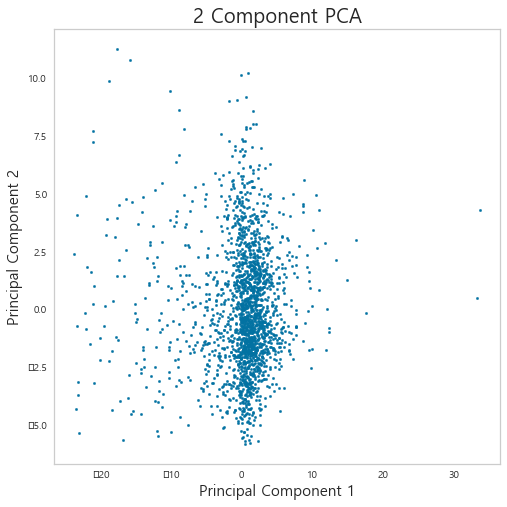

In [913]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

# colors = ["#7fc97f","#beaed4","#fdc086","#ffff99","#386cb0","#f0027f","","#666666"]
# for label, color in zip(labels, colors):
#   indicesToKeep = finalDataFrame['label'] == label
ax.scatter(df_PCA_2['Principal Component 0'], df_PCA_2['Principal Component 1'], s = 6)
# ax.legend(labels)
ax.grid()

In [920]:
import plotly.express as px
from sklearn.decomposition import PCA

n = 2
pca_2 = PCA(n, whiten = False, random_state=1105)
components = pca_2.fit_transform(Final_for_cluster_scaled)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_2.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
#     color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

#### PCA(n = 2) + K-means

In [916]:
df_PCA_2

,Principal Component 0,Principal Component 1
0,4.425,-1.748
1,4.480,-1.274
2,1.456,-1.569
3,2.821,-1.507
4,1.129,-0.757
...,...,...
1997,-8.435,0.635
1998,-11.885,1.447
1999,1.937,-0.266
2000,-21.890,1.839


##### 군집수 변화에 따른 inertia
- inertia(관성)은 군집사이의 거리가 얼마나 가까운지 나타낸다. 숫자가 작을 수록(가까울 수록) 분류가 잘 되었다는 것

n_clusters = range(2,26)

inertia = pd.DataFrame(data = [], index = n_clusters, columns = ['inertia'])

for n in n_clusters:
    model = KMeans(n_clusters=n, n_init=10, max_iter=300,
               tol=0.0001, random_state=1105, n_jobs = -1)
    model.fit(df_PCA_2)
    inertia.loc[n] = model.inertia_

inertia.plot()

In [950]:
print('explained variance ratio :', sum(pca_2.explained_variance_ratio_))

explained variance ratio : 0.45185710501825127


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC5248160>,
                 k=None, model=None)

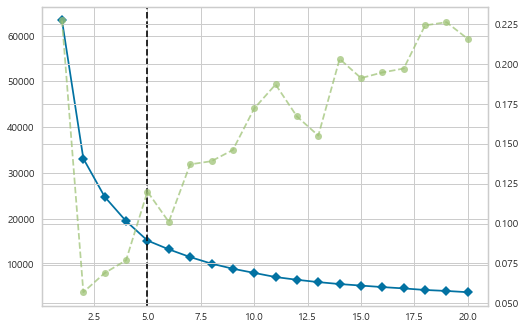

In [640]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(df_PCA_2)

##### cluster_n = 10

In [964]:
n = 10
model_2_10 = KMeans(n_clusters=n,
               n_init=10,
               max_iter=300,
               tol=0.0001,
               random_state=1105,
               n_jobs=-1)
model_2_10.fit(df_PCA_2)

predict = pd.DataFrame(model_2_10.predict(df_PCA_2), columns=['cluster'])

In [922]:
Cluster_2_10= pd.concat([df_PCA_2,predict],axis=1)

In [923]:
# PCA 하지 않고 5개로 나눈것과 똑같다predictpredictpredictpredictpredictpredict
Cluster_2_10.head()

,Principal Component 0,Principal Component 1,cluster
0,4.425,-1.748,0
1,4.480,-1.274,0
2,1.456,-1.569,3
3,2.821,-1.507,0
4,1.129,-0.757,2


##### Plot

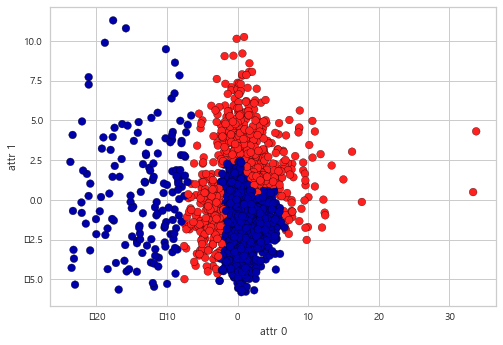

In [924]:
import matplotlib.pyplot as plt

plt.scatter(Cluster_2_10.iloc[:, 0], Cluster_2_10.iloc[:, 1], c=Cluster_2_10['cluster'], cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")

plt.show()

#### PCA(n=42) + K-means
- n = 48

In [929]:
n = 48
pca_48 = PCA(n, whiten = False, random_state=1105)

In [931]:
data_PCA = pca_48.fit_transform(Final_for_cluster_scaled)
df_PCA_48 = pd.DataFrame(data_PCA)

In [932]:
df_PCA_48.columns

RangeIndex(start=0, stop=48, step=1)

In [933]:
print('누적 분산 값:', sum(pca_48.explained_variance_ratio_))

누적 분산 값: 0.9512365831549837


##### 군집수 변화에 따른 inertia
- inertia(관성)은 군집사이의 거리가 얼마나 가까운지 나타낸다. 숫자가 작을 수록(가까울 수록) 분류가 잘 되었다는 것

In [674]:
n_clusters = range(2,26)

In [675]:
inertia = pd.DataFrame(data = [], index = n_clusters, columns = ['inertia'])

In [676]:
for n in n_clusters:
    model = KMeans(n_clusters=n, n_init=10, max_iter=300,
               tol=0.0001, random_state=1105, n_jobs = -1)
    cutoff = 1500
    model.fit(df_PCA_2.loc[0:cutoff,:])
    inertia.loc[n] = model.inertia_

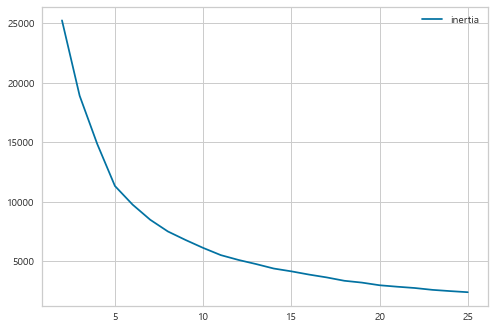

In [679]:
inertia.plot()

In [887]:
print('explained variance ratio :', sum(pca.explained_variance_ratio_))

explained variance ratio : 0.9212545647602478


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC6AD1C70>,
                 k=None, model=None)

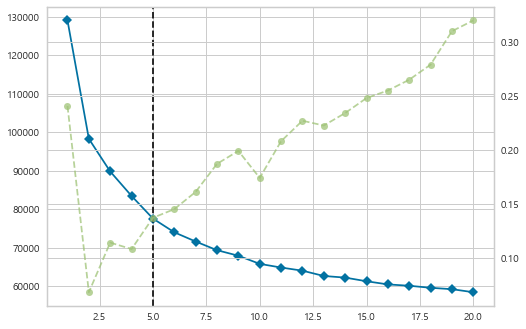

In [888]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(df_PCA_42)

##### cluster_n = 10

In [939]:
n = 10
model_48_10 = KMeans(n_clusters=n,
               n_init=10,
               max_iter=300,
               tol=0.0001,
               random_state=1105,
               n_jobs=-1)
model_48_10.fit(df_PCA_48)
predict = pd.DataFrame(model_48_10.predict(df_PCA_42), columns=['cluster'])

In [940]:
Cluster_48_10 = pd.concat([Final_for_cluster_scaled,predict],axis=1)

In [941]:
Cluster_48_10_vis = pd.concat([df_PCA_2,predict],axis=1)

In [942]:
Cluster_48_10.head()

,평일 00시,평일 01시,평일 02시,평일 03시,평일 04시,평일 05시,평일 06시,평일 07시,평일 08시,평일 09시,평일 10시,평일 11시,평일 12시,평일 13시,평일 14시,평일 15시,평일 16시,평일 17시,평일 18시,평일 19시,평일 20시,평일 21시,평일 22시,평일 23시,주말 00시,주말 01시,주말 02시,주말 03시,주말 04시,주말 05시,주말 06시,주말 07시,주말 08시,주말 09시,주말 10시,주말 11시,주말 12시,주말 13시,주말 14시,주말 15시,주말 16시,주말 17시,주말 18시,주말 19시,주말 20시,주말 21시,주말 22시,주말 23시,운영방식,세대수,거주자총인구수,20s,30s,1인가구수,20대_통근통학인구,30대_통근통학인구,market_shortest,park_shortest,subway_shortest,school_shortest,culture_shortest,bus_shortest,한강400m내여부,시장400m내포함개수,공원400m내포함개수,지하철400m내포함개수,중고대(원)400m내포함개수,문화공간400m내포함개수,버스정류장400m내포함개수,가로수길400m내포함개수,cluster
0,0.570,0.493,0.472,0.264,0.398,0.606,0.240,0.196,0.414,0.420,0.528,0.525,0.396,0.537,0.455,0.520,0.536,0.918,1.068,0.790,0.939,0.644,0.907,0.438,0.592,0.506,0.766,0.332,0.597,0.713,0.973,0.344,0.206,0.491,0.325,0.671,0.558,0.304,0.757,0.997,0.796,0.946,1.082,0.464,0.686,0.668,1.193,0.627,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-1.042,-1.042,-1.042,-1.042,-1.042,-1.042,-0.310,-0.383,-0.119,-0.733,-0.761,-0.485,-0.838,-0.424,1
1,0.572,0.957,0.337,0.348,0.533,0.565,0.809,0.412,1.131,0.496,0.365,0.318,0.173,0.123,0.749,0.505,0.865,0.563,0.476,0.581,0.867,1.017,0.707,1.117,0.808,0.539,1.071,0.581,0.357,0.713,0.382,0.517,0.357,0.461,0.516,0.450,0.779,0.317,0.481,0.517,1.083,0.885,0.625,1.068,0.834,0.825,0.679,0.486,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.807,-0.807,-0.807,-0.807,-0.807,-0.807,-0.310,0.923,-0.119,0.516,-0.761,-0.485,1.107,-0.424,1
2,0.363,0.159,0.468,0.317,0.337,0.349,0.504,0.319,0.248,0.067,0.283,0.184,0.200,0.129,-0.021,-0.132,-0.035,-0.206,-0.444,0.129,0.043,0.396,0.287,0.173,0.178,-0.002,0.502,0.467,0.496,0.441,0.618,0.277,0.147,0.938,0.160,-0.051,0.454,0.207,-0.007,0.113,-0.027,-0.155,-0.258,0.058,-0.103,-0.106,0.395,0.213,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.931,-0.931,-0.931,-0.931,-0.931,-0.931,-0.310,0.923,0.430,0.516,-0.761,-0.485,0.508,-0.424,3
3,0.281,0.518,0.245,0.277,0.337,0.349,0.487,0.136,-0.091,0.020,0.239,0.374,0.548,0.337,0.480,0.211,0.335,0.087,0.254,0.378,0.295,0.173,0.981,0.114,0.423,0.324,0.301,0.440,0.357,0.441,0.776,0.277,0.147,0.117,0.672,0.004,0.619,0.460,0.505,0.490,0.810,0.450,0.149,0.408,0.431,0.291,0.967,0.744,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.974,-0.974,-0.974,-0.974,-0.974,-0.974,-0.310,2.228,-0.119,1.765,0.074,0.266,0.807,-0.424,3
4,0.165,0.205,0.277,0.212,0.337,0.349,0.584,0.298,0.096,0.683,0.112,0.023,0.085,0.150,0.148,0.205,-0.056,-0.054,-0.154,-0.166,-0.139,0.093,0.042,-0.086,0.137,-0.002,0.344,0.219,1.282,0.441,0.382,0.446,0.147,0.474,0.204,0.085,-0.016,-0.201,0.289,-0.385,-0.042,-0.029,-0.282,0.087,0.221,0.212,0.090,-0.124,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.499,-0.499,-0.499,-0.499,-0.499,-0.499,-0.310,2.228,-0.119,1.765,0.074,0.266,0.209,-0.424,3


##### Plot

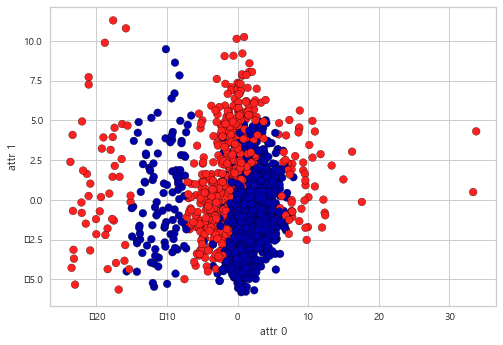

In [943]:
import matplotlib.pyplot as plt

plt.scatter(Cluster_48_10_vis.iloc[:, 0], Cluster_48_10_vis.iloc[:, 1], c=Cluster_48_10_vis['cluster'], cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")

plt.show()

In [947]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(Cluster_48_10, model_48_10.predict(df_PCA_42))

0.10769102442833706

#### no PCA + K-means

In [717]:
Final_for_cluster_scaled.head()

,평일 00시,평일 01시,평일 02시,평일 03시,평일 04시,평일 05시,평일 06시,평일 07시,평일 08시,평일 09시,평일 10시,평일 11시,평일 12시,평일 13시,평일 14시,평일 15시,평일 16시,평일 17시,평일 18시,평일 19시,평일 20시,평일 21시,평일 22시,평일 23시,주말 00시,주말 01시,주말 02시,주말 03시,주말 04시,주말 05시,주말 06시,주말 07시,주말 08시,주말 09시,주말 10시,주말 11시,주말 12시,주말 13시,주말 14시,주말 15시,주말 16시,주말 17시,주말 18시,주말 19시,주말 20시,주말 21시,주말 22시,주말 23시,운영방식,세대수,거주자총인구수,20s,30s,1인가구수,20대_통근통학인구,30대_통근통학인구,market_shortest,park_shortest,subway_shortest,school_shortest,culture_shortest,bus_shortest,한강400m내여부,시장400m내포함개수,공원400m내포함개수,지하철400m내포함개수,중고대(원)400m내포함개수,문화공간400m내포함개수,버스정류장400m내포함개수,가로수길400m내포함개수
0,0.570,0.493,0.472,0.264,0.398,0.606,0.240,0.196,0.414,0.420,0.528,0.525,0.396,0.537,0.455,0.520,0.536,0.918,1.068,0.790,0.939,0.644,0.907,0.438,0.592,0.506,0.766,0.332,0.597,0.713,0.973,0.344,0.206,0.491,0.325,0.671,0.558,0.304,0.757,0.997,0.796,0.946,1.082,0.464,0.686,0.668,1.193,0.627,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-1.042,-1.042,-1.042,-1.042,-1.042,-1.042,-0.310,-0.383,-0.119,-0.733,-0.761,-0.485,-0.838,-0.424
1,0.572,0.957,0.337,0.348,0.533,0.565,0.809,0.412,1.131,0.496,0.365,0.318,0.173,0.123,0.749,0.505,0.865,0.563,0.476,0.581,0.867,1.017,0.707,1.117,0.808,0.539,1.071,0.581,0.357,0.713,0.382,0.517,0.357,0.461,0.516,0.450,0.779,0.317,0.481,0.517,1.083,0.885,0.625,1.068,0.834,0.825,0.679,0.486,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.807,-0.807,-0.807,-0.807,-0.807,-0.807,-0.310,0.923,-0.119,0.516,-0.761,-0.485,1.107,-0.424
2,0.363,0.159,0.468,0.317,0.337,0.349,0.504,0.319,0.248,0.067,0.283,0.184,0.200,0.129,-0.021,-0.132,-0.035,-0.206,-0.444,0.129,0.043,0.396,0.287,0.173,0.178,-0.002,0.502,0.467,0.496,0.441,0.618,0.277,0.147,0.938,0.160,-0.051,0.454,0.207,-0.007,0.113,-0.027,-0.155,-0.258,0.058,-0.103,-0.106,0.395,0.213,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.931,-0.931,-0.931,-0.931,-0.931,-0.931,-0.310,0.923,0.430,0.516,-0.761,-0.485,0.508,-0.424
3,0.281,0.518,0.245,0.277,0.337,0.349,0.487,0.136,-0.091,0.020,0.239,0.374,0.548,0.337,0.480,0.211,0.335,0.087,0.254,0.378,0.295,0.173,0.981,0.114,0.423,0.324,0.301,0.440,0.357,0.441,0.776,0.277,0.147,0.117,0.672,0.004,0.619,0.460,0.505,0.490,0.810,0.450,0.149,0.408,0.431,0.291,0.967,0.744,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.974,-0.974,-0.974,-0.974,-0.974,-0.974,-0.310,2.228,-0.119,1.765,0.074,0.266,0.807,-0.424
4,0.165,0.205,0.277,0.212,0.337,0.349,0.584,0.298,0.096,0.683,0.112,0.023,0.085,0.150,0.148,0.205,-0.056,-0.054,-0.154,-0.166,-0.139,0.093,0.042,-0.086,0.137,-0.002,0.344,0.219,1.282,0.441,0.382,0.446,0.147,0.474,0.204,0.085,-0.016,-0.201,0.289,-0.385,-0.042,-0.029,-0.282,0.087,0.221,0.212,0.090,-0.124,-0.582,0.053,0.394,0.030,0.394,-0.440,-0.200,0.086,-0.499,-0.499,-0.499,-0.499,-0.499,-0.499,-0.310,2.228,-0.119,1.765,0.074,0.266,0.209,-0.424


##### 군집수 변화에 따른 inertia

n_clusters = range(2,26)

inertia = pd.DataFrame(data = [], index = n_clusters, columns = ['inertia'])

for n in n_clusters:
    model = KMeans(n_clusters=n, n_init=10, max_iter=300,
               tol=0.0001, random_state=1105, n_jobs = -1)
    cutoff = 3000
    model.fit(Final_for_cluster_scaled.loc[0:cutoff,:])
    inertia.loc[n] = model.inertia_

inertia.plot()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC7FDA580>,
                 k=None, model=None)

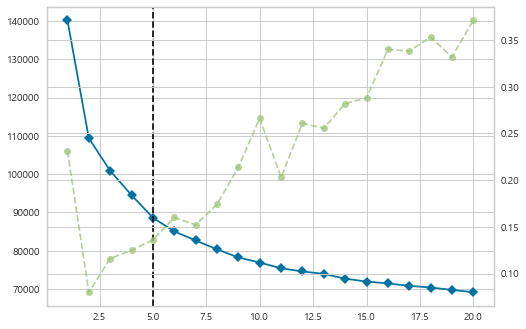

In [951]:
from yellowbrick.cluster import KElbowVisualizer
n = 17
model_70_10 = KMeans(n_clusters=n,
               n_init=10,
               max_iter=300,
               tol=0.0001,
               random_state=1105,
               n_jobs=-1)
visualizer = KElbowVisualizer(model_70_10, k=(1,21))
visualizer.fit(Final_for_cluster_scaled)

##### cluster_n = 10

In [980]:
n =10
model_70_10 = KMeans(n_clusters=n,
               n_init=30,
               max_iter=500,
               tol=0.0001,
               random_state=1105,
               n_jobs=-1)
model_70_10.fit(Final_for_cluster_scaled)
predict = pd.DataFrame(model_70_10.predict(Final_for_cluster_scaled), columns=['cluster'])

In [981]:
Cluster_70_10 = pd.concat([Final_for_cluster_scaled,predict],axis=1)

In [982]:
Cluster_70_10_vis = pd.concat([df_PCA_2,predict],axis=1)

##### Plot

In [983]:
Cluster_70_10_vis

,Principal Component 0,Principal Component 1,cluster
0,4.425,-1.748,1
1,4.480,-1.274,1
2,1.456,-1.569,1
3,2.821,-1.507,1
4,1.129,-0.757,1
...,...,...,...
1997,-8.435,0.635,2
1998,-11.885,1.447,2
1999,1.937,-0.266,1
2000,-21.890,1.839,6


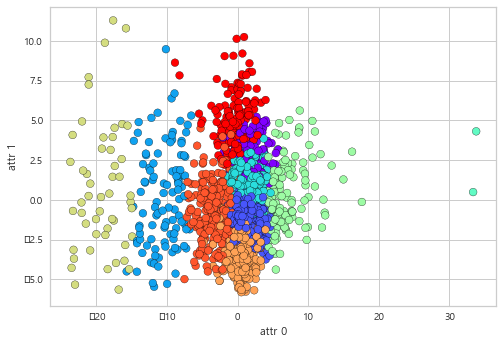

In [984]:
import matplotlib.pyplot as plt

plt.scatter(Cluster_70_10_vis.iloc[:, 0], Cluster_70_10_vis.iloc[:, 1], c= Cluster_70_10_vis['cluster'], cmap=plt.cm.rainbow, s=60, edgecolors='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")

plt.show()

##### cluster_n = 5

In [986]:
n =5
model_70_5 = KMeans(n_clusters=n,
               n_init=20,
               max_iter=500,
               tol=0.0001,
               random_state=1105,
               n_jobs=-1)
model_70_5.fit(Final_for_cluster_scaled)
predict = pd.DataFrame(model_70_5.predict(Final_for_cluster_scaled), columns=['cluster'])

In [987]:
Cluster_70_5 = pd.concat([Final_for_cluster_scaled,predict],axis=1)

In [988]:
Cluster_70_5_vis = pd.concat([df_PCA_2,predict],axis=1)

##### Plot

In [989]:
Cluster_70_5_vis

,Principal Component 0,Principal Component 1,cluster
0,4.425,-1.748,0
1,4.480,-1.274,0
2,1.456,-1.569,0
3,2.821,-1.507,0
4,1.129,-0.757,0
...,...,...,...
1997,-8.435,0.635,4
1998,-11.885,1.447,1
1999,1.937,-0.266,0
2000,-21.890,1.839,1


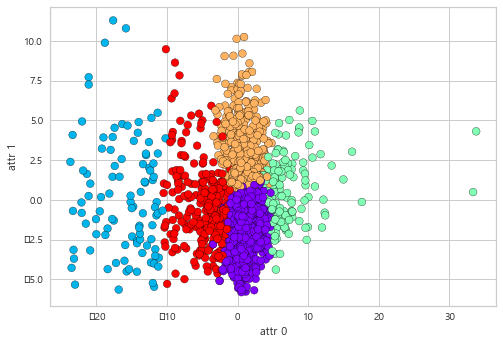

In [990]:
import matplotlib.pyplot as plt

plt.scatter(Cluster_70_5_vis.iloc[:, 0], Cluster_70_5_vis.iloc[:, 1], c= Cluster_70_5_vis['cluster'], cmap=plt.cm.rainbow, s=60, edgecolors='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")

plt.show()

#### K-means 실루엣 평가

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km ==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
                edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('clusters')
    plt.xlabel('score')
    plt.show()


##### PCA = 2 & Cluster = 10

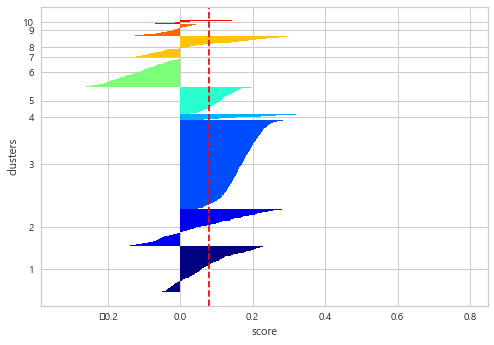

0.07953857301122723

In [963]:
y_km = model_70_10.fit_predict(Final_for_cluster_scaled)
plotSilhouette(Final_for_cluster_scaled,y_km)

from sklearn.metrics.cluster import silhouette_score
silhouette_score(Final_for_cluster_scaled, y_km)

##### PCA = 42 & Cluster = 10

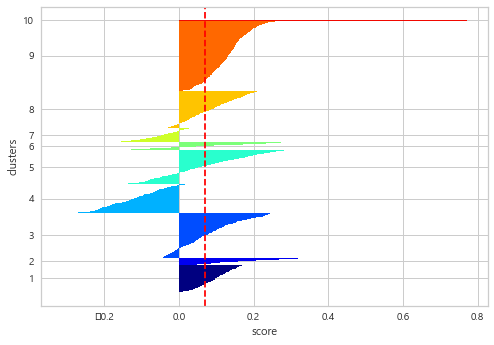

0.06887316967475379

In [772]:
##### PCA = 2 & Cluster = 10km = KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(Final_for_cluster_scaled)
plotSilhouette(Final_for_cluster_scaled,y_km)

from sklearn.metrics.cluster import silhouette_score
silhouette_score(Final_for_cluster_scaled, y_km)

##### PCA = none & Cluster = 10

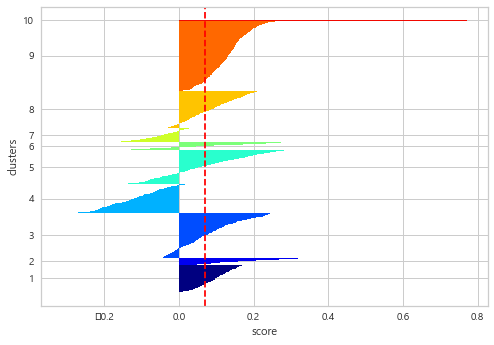

0.06887316967475379

In [772]:
km = KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(Final_for_cluster_scaled)
plotSilhouette(Final_for_cluster_scaled,y_km)

from sklearn.metrics.cluster import silhouette_score
silhouette_score(Final_for_cluster_scaled, y_km)

##### PCA = none & Cluster = 5

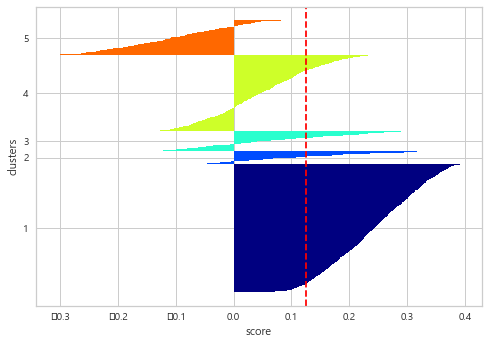

0.12501335113729645

In [991]:
y_km = model_70_5.fit_predict(Final_for_cluster_scaled)
plotSilhouette(Final_for_cluster_scaled,y_km)

from sklearn.metrics.cluster import silhouette_score
silhouette_score(Final_for_cluster_scaled, y_km)

0.05658185855549786

#### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

##### PCA = 2

In [781]:
eps = 1.2
min_samples = 20
leaf_size = 30
n_jobs = -1

db = DBSCAN(eps=eps,
            min_samples=min_samples,
            leaf_size=leaf_size,
            n_jobs=n_jobs)

# cutoff = 99
PCA_2_dbscan_Clustered = db.fit_predict(df_PCA_2)
PCA_2_dbscan_Clustered = \
    pd.DataFrame(data=PCA_2_dbscan_Clustered, index=Whole_data_1_scaled.index, \
                 columns=['cluster'])
PCA_2_dbscan_Clustered['cluster'].value_counts()

 1    854
 0    296
-1    273
 4    269
 3    164
 2    146
Name: cluster, dtype: int64

In [782]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(Final_for_cluster_scaled, db.fit_predict(df_PCA_2))

-0.01027010981692159

##### PCA = 42

In [829]:
eps = 7
min_samples = 3
leaf_size = 30
n_jobs = -1

db = DBSCAN(eps=eps,
            min_samples=min_samples,
            leaf_size=leaf_size,
            n_jobs=n_jobs)

# cutoff = 99
PCA_42_dbscan_Clustered = db.fit_predict(df_PCA_42)
PCA_42_dbscan_Clustered = \
    pd.DataFrame(data=PCA_42_dbscan_Clustered, index=Final_for_cluster_scaled.index, \
                 columns=['cluster'])
PCA_42_dbscan_Clustered['cluster'].value_counts()

 0    1691
-1     297
 1      14
Name: cluster, dtype: int64

In [830]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(Final_for_cluster_scaled, db.fit_predict(df_PCA_42))

0.40917868529358786

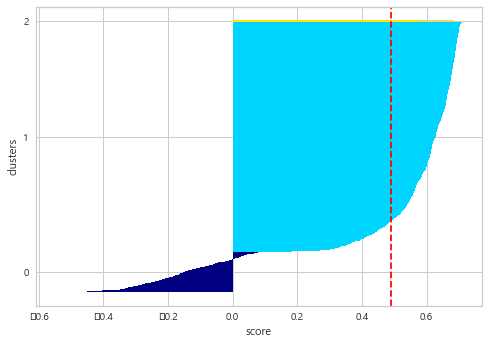

0.09384205452296511

In [831]:
y_db = db.fit_predict(df_PCA_42)
plotSilhouette(df_PCA_42,y_db)
silhouette_score(df_PCA_42, y_km)

#### PCA = none

In [994]:
eps = 2
min_samples = 3
leaf_size = 30
n_jobs = -1

db = DBSCAN(eps=eps,
            min_samples=min_samples,
            leaf_size=leaf_size,
            n_jobs=n_jobs)

# cutoff = 99
PCA_70_dbscan_Clustered = db.fit_predict(Final_for_cluster_scaled)
PCA_70_dbscan_Clustered = \
    pd.DataFrame(data=PCA_70_dbscan_Clustered, index=Final_for_cluster_scaled.index, \
                 columns=['cluster'])
PCA_70_dbscan_Clustered['cluster'].value_counts()

-1    1965
 4       6
 1       5
 5       5
 8       4
 6       4
 3       4
 7       3
 2       3
 0       3
Name: cluster, dtype: int64

In [838]:
PCA_2_dbscan_Clustered

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
1997,-1
1998,-1
1999,-1
2000,-1


In [839]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(Final_for_cluster_scaled, db.fit_predict(df_PCA_2))

-0.01027010981692159

In [740]:
set(clusters)

{-1, 0}

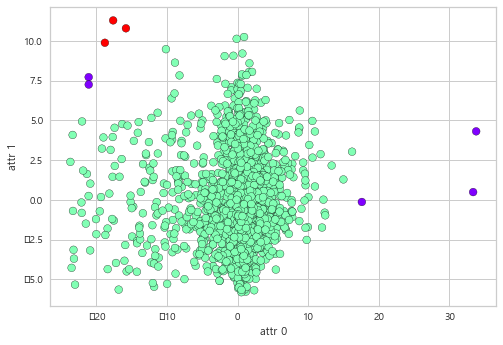

In [993]:
import matplotlib.pyplot as plt

clusters = db.fit_predict(df_PCA_2)

plt.scatter(df_PCA_2.iloc[:, 0], df_PCA_2.iloc[:, 1], c=clusters, cmap=plt.cm.rainbow, s=60, edgecolors='black')

plt.xlabel("attr 0")

plt.ylabel("attr 1")

plt.show()

#### 병합군집

In [247]:
!pip install cluster

  Created wheel for cluster: filename=cluster-1.4.1.post2-py2.py3-none-any.whl size=28733 sha256=0787dc866f7a996beb726858fea61dc2712f97586a3fe2ae6748835653fb937b
  Stored in directory: c:\users\justi\appdata\local\pip\cache\wheels\92\b7\a3\b2656127f950b2f10e93b79370d23ad28e3857dd68faaba5f0
Successfully built cluster


In [248]:
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

from sklearn.metrics.cluster import adjusted_rand_score

import matplotlib.pyplot as plt

import numpy as np

import mglearn

In [254]:
X_scaled

,Principal Component 0,Principal Component 1
0,4.253353,-0.199752
1,4.381204,-0.191199
2,1.311128,0.099844
3,2.662334,-0.059223
4,1.045858,0.118243
...,...,...
1997,-8.407413,1.344988
1998,-11.806140,1.532947
1999,1.832908,0.668720
2000,-21.693003,1.068797


TypeError: '(slice(None, None, None), 0)' is an invalid key

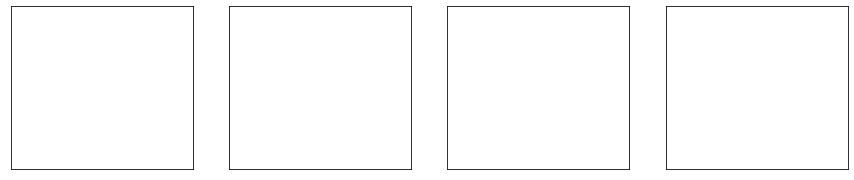

In [253]:

X_scaled = df_PCA_2



fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})



# 3가지 알고리즘들 리스트

algos = [KMeans(n_clusters=5), AgglomerativeClustering(n_clusters=5), DBSCAN()]

random_state = np.random.RandomState(seed=0)

random_clusters = random_state.randint(low=0, high=2, size=len(X_scaled))



# 무작위로 할당한 클러스터

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')

axes[0].set_title("random assign : {:.2f}".format(silhouette_score(X_scaled, random_clusters)))



for ax, algo in zip(axes[1:], algos):

    clusters = algo.fit_predict(X_scaled)

    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')

    ax.set_title("{} : {:.2f}".format(algo.__class__.__name__, silhouette_score(X_scaled, clusters)))

plt.show()

#### 계층군집